In [1]:
%autosave 0

Autosave disabled


### 0. Dependencies

In [2]:
# Basics
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

# Statistical interference
import scipy.stats
from scipy import stats
from scipy.stats import skewtest
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import chi2

# Preprocessing
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import make_column_transformer

# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Model selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Other dependencies
from sklearn.pipeline import make_pipeline
from sklearn.exceptions import NotFittedError

# 1. Data Overwiew

Anonymous DataSet.<br>
The underlying phenomenon and data quality are unknown.<br>
Binary target 'Y' is to be predicted.<br><br>
Data source:<br>
URL: https://www.kaggle.com/datasets/alimohammedbakhiet/anonymous-data<br>

#### First outlook indicates that some rows consists of zeros only (Output 1.1).

In [3]:
print('Output 1.1')
df = pd.read_csv('or_data.csv')
df

Output 1.1


,YEAR,Y,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,R14,R15,R16
0,2018,1,4.676,6.034,3.317,0.628,0.602,0.959,1.150,1.745,1.000,0.357,0.357,3.433,0.114,0.068,0.192,0.068
1,2017,1,4.849,5.824,3.862,0.667,0.571,0.856,1.033,1.291,1.000,0.383,0.383,3.343,0.152,0.087,0.226,0.087
2,2016,1,4.450,5.388,3.649,0.651,0.701,1.078,1.324,1.592,1.054,0.383,0.404,3.343,0.099,0.070,0.172,0.066
3,2015,1,8.124,9.276,6.541,0.816,0.750,0.919,1.030,1.303,1.000,0.687,0.687,7.807,0.105,0.079,0.115,0.079
4,2014,1,5.301,6.719,3.905,0.798,0.526,0.659,0.774,1.133,1.000,0.747,0.747,6.289,0.083,0.044,0.059,0.044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,2015,0,1.550,2.424,0.375,0.331,0.129,0.389,0.663,2.518,1.000,0.343,0.343,2.514,-0.451,-0.058,-0.169,-0.058
1116,2014,0,0.926,1.854,0.066,0.258,0.114,0.443,0.961,12.520,1.000,0.444,0.444,3.198,-0.561,-0.064,-0.144,-0.064
1117,2013,0,0.872,1.518,0.117,0.310,0.128,0.415,1.216,5.380,1.000,0.199,0.199,0.977,-0.465,-0.060,-0.299,-0.060
1118,2012,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


#### No apparent NaNs found, 1120 samples, 18 columns, various dtypes (Output 1.2)

In [4]:
print('Output 1.2\n')
df.info()

Output 1.2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120 entries, 0 to 1119
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    1120 non-null   int64  
 1   Y       1120 non-null   int64  
 2   R1      1120 non-null   object 
 3   R2      1120 non-null   object 
 4   R3      1120 non-null   float64
 5   R4      1120 non-null   float64
 6   R5      1120 non-null   float64
 7   R6      1120 non-null   float64
 8   R7      1120 non-null   object 
 9   R8      1120 non-null   object 
 10  R9      1120 non-null   float64
 11  R10     1120 non-null   float64
 12  R11     1120 non-null   float64
 13  R12     1120 non-null   object 
 14  R13     1120 non-null   object 
 15  R14     1120 non-null   float64
 16  R15     1120 non-null   object 
 17  R16     1120 non-null   float64
dtypes: float64(9), int64(2), object(7)
memory usage: 157.6+ KB


#### Target distribution is imbalanced (Output 1.3)

In [5]:
print('Output 1.3')
df['Y'].value_counts(normalize=True)

Output 1.3


1    0.642857
0    0.357143
Name: Y, dtype: float64

#### Except YEAR and R9, all other variables seems to be floats (Output 1.4)

In [6]:
print('Output 1.4\n')
for col in df.columns:
    print(col, len(df[col].unique()))

Output 1.4

YEAR 8
Y 2
R1 752
R2 789
R3 529
R4 570
R5 627
R6 701
R7 807
R8 821
R9 66
R10 473
R11 476
R12 641
R13 505
R14 364
R15 687
R16 360


#### Nominal feature YEAR has balanced distribution (Output 1.5).

In [7]:
print('Output 1.5')
df['YEAR'].value_counts()

Output 1.5


2011    140
2012    140
2013    140
2014    140
2015    140
2016    140
2017    140
2018    140
Name: YEAR, dtype: int64

#### (Output 1.6) and (Output 1.7) implies, that little information is brought by essentially invariant R9 feature.

In [8]:
print('Output 1.6')
df['R9'].value_counts()

Output 1.6


 1.000    1013
-1.000      14
 0.000      10
 0.647       4
 0.536       4
          ... 
 4.598       1
 7.227       1
 0.921       1
 1.076       1
 1.150       1
Name: R9, Length: 66, dtype: int64

In [9]:
print('Output 1.7')
df.loc[(df['R9'] != 1), 'Y'].value_counts()

Output 1.7


1    61
0    46
Name: Y, dtype: int64

# 2. Data Cleaning

This section contains procedures that needs to be executed on both, training and testing samples. Last subsection splits the data.

#### Invariant feature R9 is considered irrelevant and is excluded (Output 2.1)

In [10]:
# Output 2.1
df = df.drop('R9', axis=1)

### Dtype conversion

#### Since all features (except YEAR) are deemed to be floats (Output 1.4), dtype conversion is neccessary for further analysis.<br> However, object dtype data contains separators, what is indicated by (Output 2.2).

In [11]:
print('Output 2.2')
for col in df.columns:
    if df[col].dtype == object:
        print('{} contains {} separators'.format(col, df[col].str.contains(',').sum()))

Output 2.2
R1 contains 1 separators
R2 contains 1 separators
R7 contains 1 separators
R8 contains 9 separators
R12 contains 1 separators
R13 contains 2 separators
R15 contains 1 separators


#### Data containing separators have been removed (Output 2.3) and the dtype conversion is performed (Output 2.4).

In [12]:
# Output 2.3
for col in df.columns:
    if df[col].dtype == object:
        df = df[~(df[col].str.contains(','))]

In [13]:
# Output 2.4
for col in df.columns:
    if df[col].dtype == object:
        df[col] = df[col].astype('float')

### Rows containing only zeros

#### As it has been shown by (Output 1.1), the data contains rows of zeros only. These rows have been found and removed from the data (Output 2.5). Nine rows have been excluded. 

In [14]:
# Output 2.5
temp_df = df.drop(['YEAR', 'Y'], axis=1)
indicies = []
for i in temp_df.index:
    if (temp_df.loc[i].sum() == 0):
        indicies.append(i)
for i in indicies:
    df = df.drop(index=i)

### Duplicates

#### Number of duplicates found is displayed in (Output 2.6). These are evenly distributed in a systematic, maybe artificial, manner (Output 2.7).<br> All dupicates have been excluded; number of rows in data shrinked to 878 (Output 2.8). Target class distribution imbalance has deepened as a consequence (Output 2.9). 

In [15]:
print('Output 2.6')
print(df.duplicated().sum())

Output 2.6
218


In [16]:
print('Output 2.7')
print('Duplicates distribution\n')

temp_df = df.loc[df.duplicated(), :]

same_columns = 0
for i in temp_df.index:
    no_of_dupicates = 0
    for j in df.index:
        for col in df.columns:
            if (df.loc[i, col] != df.loc[j, col]):
                break
            same_columns += 1 
        if same_columns == len(df.columns):
            no_of_dupicates += 1
            if j != i:
                print('duplicate index: {}'.format(j))
        same_columns = 0
    print('row: {}, no. of duplicates: {}\n'.format(i, no_of_dupicates - 1))

Output 2.7
Duplicates distribution

duplicate index: 272
row: 472, no. of duplicates: 1

duplicate index: 273
row: 473, no. of duplicates: 1

duplicate index: 274
row: 474, no. of duplicates: 1

duplicate index: 276
row: 476, no. of duplicates: 1

duplicate index: 277
row: 477, no. of duplicates: 1

duplicate index: 278
row: 478, no. of duplicates: 1

duplicate index: 279
row: 479, no. of duplicates: 1

duplicate index: 352
duplicate index: 632
duplicate index: 1088
row: 536, no. of duplicates: 3

duplicate index: 353
duplicate index: 633
duplicate index: 1089
row: 537, no. of duplicates: 3

duplicate index: 354
duplicate index: 634
duplicate index: 1090
row: 538, no. of duplicates: 3

duplicate index: 355
duplicate index: 635
duplicate index: 1091
row: 539, no. of duplicates: 3

duplicate index: 356
duplicate index: 636
duplicate index: 1092
row: 540, no. of duplicates: 3

duplicate index: 357
duplicate index: 637
duplicate index: 1093
row: 541, no. of duplicates: 3

duplicate index: 

row: 849, no. of duplicates: 1

duplicate index: 338
row: 850, no. of duplicates: 1

duplicate index: 340
row: 852, no. of duplicates: 1

duplicate index: 341
row: 853, no. of duplicates: 1

duplicate index: 342
row: 854, no. of duplicates: 1

duplicate index: 343
row: 855, no. of duplicates: 1

duplicate index: 344
duplicate index: 624
duplicate index: 1080
row: 896, no. of duplicates: 3

duplicate index: 625
duplicate index: 1081
row: 897, no. of duplicates: 2

duplicate index: 346
duplicate index: 626
duplicate index: 1082
row: 898, no. of duplicates: 3

duplicate index: 347
duplicate index: 627
duplicate index: 1083
row: 899, no. of duplicates: 3

duplicate index: 348
duplicate index: 628
duplicate index: 1084
row: 900, no. of duplicates: 3

duplicate index: 630
duplicate index: 1086
row: 902, no. of duplicates: 2

duplicate index: 631
duplicate index: 1087
row: 903, no. of duplicates: 2

duplicate index: 512
row: 944, no. of duplicates: 1

duplicate index: 513
row: 945, no. of dup

In [17]:
print('Output 2.8')
print('Data shape')
df.drop_duplicates(inplace = True)
df.shape

Output 2.8
Data shape


(878, 17)

In [18]:
print('Output 2.9')
print('Target class distribution')

df.Y.value_counts(normalize=True)

Output 2.9
Target class distribution


1    0.671982
0    0.328018
Name: Y, dtype: float64

### Train/Test sample split

#### Before any statistical interference occurs, independent testing sample is created (Output 2.10).

In [19]:
# Output 2.10
y = df['Y']
X = df.drop('Y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8, stratify=df['Y'])
df = pd.concat([X_train, y_train], axis=1)

# 3. Features' statistical significance

Here, statistical interference is conducted in order to filter out irrelevant features.

### Numeric features

In [20]:
print('Output 3.1')
print('Statistical interference results and conclusion (target vs numeric features)\n')
# statistical interference (Spearman corr coefficient)
spearman_list = []
for col in df.columns:
    if (col == 'Y')|(col=='YEAR'):
        continue
    if (scipy.stats.spearmanr(df[['Y', col]]).pvalue < 0.05):
        spearman_list.append(col)
        
print('*Statistically significant numeric variables (Spearman corr):')
print(spearman_list)

# statistical interference (Pearson corr coefficient)
pearson_list = []
for col in df.columns:
    if (col == 'Y')|(col=='YEAR'):
        continue
    if (scipy.stats.pearsonr(df['Y'], df[col])[1] < 0.05):
        pearson_list.append(col)
        
print('\n*Statistically significant numeric variables (Pearson corr):')
print(pearson_list)

# statistical interference (Kendall corr coefficient)
kendall_list = []
for col in df.columns:
    if (col == 'Y')|(col=='YEAR'):
        continue
    tau, p_value = stats.kendalltau(df['Y'], df[col])
    if (p_value < 0.05):
        kendall_list.append(col)       

print('\n*Statistically significant numeric variables (Kendall corr):')
print(kendall_list)

siginificant_features = set(spearman_list + pearson_list + kendall_list)

print('\nSIGNIFICANT NUMERIC FEATURES:')
features = []
for col in df.columns:
    if (col == 'Y')|(col=='YEAR'):
        continue
    for var in siginificant_features:
        if col == var:
            features.append(col)
print(features)

Output 3.1
Statistical interference results and conclusion (target vs numeric features)

*Statistically significant numeric variables (Spearman corr):
['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R13', 'R14', 'R15', 'R16']

*Statistically significant numeric variables (Pearson corr):
['R1', 'R2', 'R8', 'R13', 'R14', 'R15', 'R16']

*Statistically significant numeric variables (Kendall corr):
['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R13', 'R14', 'R15', 'R16']

SIGNIFICANT NUMERIC FEATURES:
['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R13', 'R14', 'R15', 'R16']


#### Conclusion is, that total of 12 features are included for futher analysis, with 3 features being dropped at this stage (Output 3.2). 

In [21]:
# Output 3.2
variables = ['YEAR']
variables_df = ['Y', 'YEAR']
for col in df.columns:
    for feature in features:
        if col == feature:
            variables.append(col)
            variables_df.append(col)
X_train = X_train.loc[:, variables]
X_test = X_test.loc[:, variables]
df = df.loc[:, variables_df]

### Nominal feature

#### Chi-square independence test has been employed in order to asses the relationship between target variable Y and feature YEAR (Output 3.3). Feature YEAR is found to be irrelevant and therefore has been exluded (Output 3.4).

In [22]:
print('Output 3.3')
print('Chi-square independence test between target variable Y and feature YEAR\n')
# contingency table
contingency_table=pd.crosstab(df['Y'],df['YEAR'])
# observed values
Observed_Values = contingency_table.values
# expected values
b=scipy.stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
# degree of freedom
no_of_rows=len(contingency_table.iloc[:,0])
no_of_columns=len(contingency_table.iloc[0,:])
d_of_f=(no_of_rows-1)*(no_of_columns-1)
# significance level 5%
alpha=0.05
# chi-square statistic - χ2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
# critical_value
critical_value=chi2.ppf(q=1-alpha,df=d_of_f)
# p-value (probability under the null)
p_value=1-chi2.cdf(x=chi_square_statistic,df=d_of_f)
# summary (no relationship between target and 'YEAR')
print('Significance level: ',alpha)
print('Degree of Freedom: ',d_of_f)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

Output 3.3
Chi-square independence test between target variable Y and feature YEAR

Significance level:  0.05
Degree of Freedom:  7
chi-square statistic: 0.5735712821286356
critical_value: 14.067140449340169
p-value: 0.9991300278603774


In [23]:
# Output 3.4
df = df.drop('YEAR', axis=1)
X_train = X_train.drop('YEAR', axis=1)
X_test = X_test.drop('YEAR', axis=1)

# 4. Distributions

#### Wealth of information regarding features distributions is shown by (Output 4.1). Outliers have been detected. 

Output 4.1
Continious features distributions

*********************************************************************************************************
R1
count    702.000000
mean       2.837141
std       12.845022
min      -11.163000
25%        0.531500
50%        1.022500
75%        1.996750
max      223.488000
Name: R1, dtype: float64


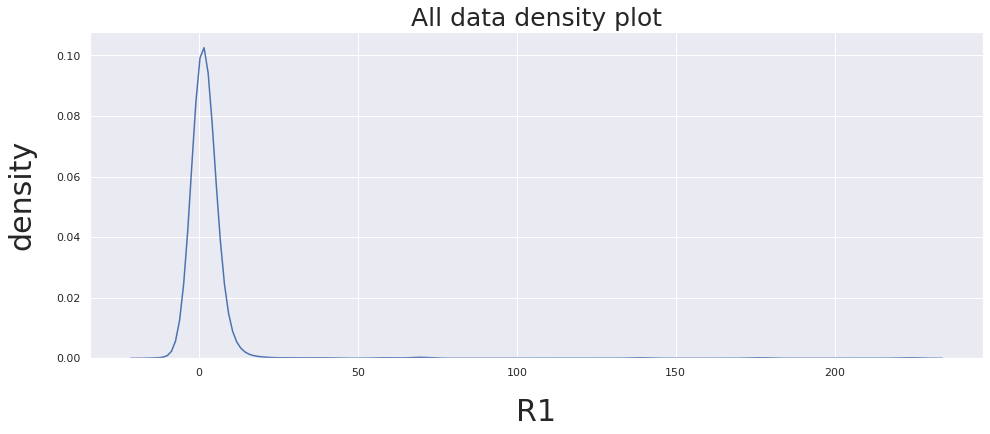

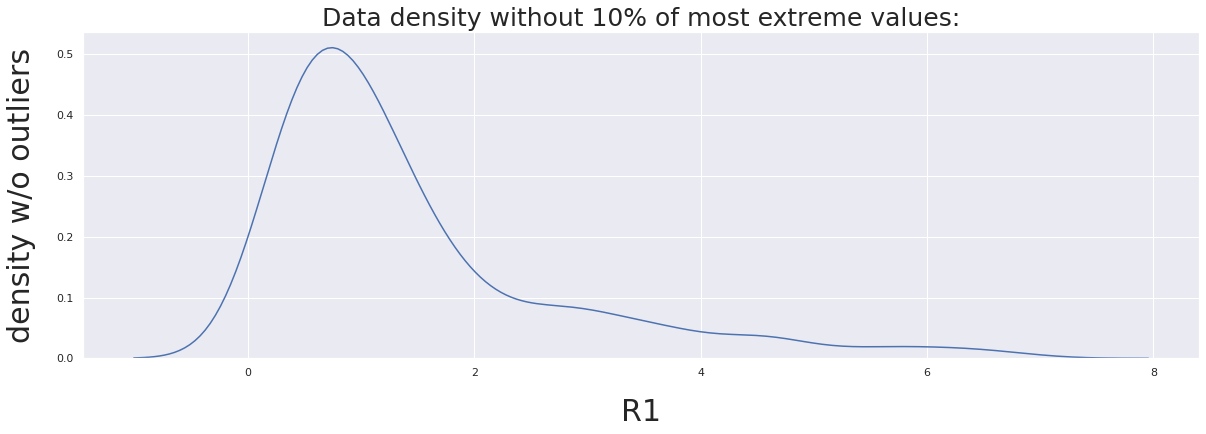

SkewtestResult(statistic=31.25569635022701, pvalue=1.8680941053179523e-214)


*********************************************************************************************************
R2
count    702.000000
mean       3.236266
std       12.884866
min       -0.877000
25%        0.821750
50%        1.383000
75%        2.392500
max      224.686000
Name: R2, dtype: float64


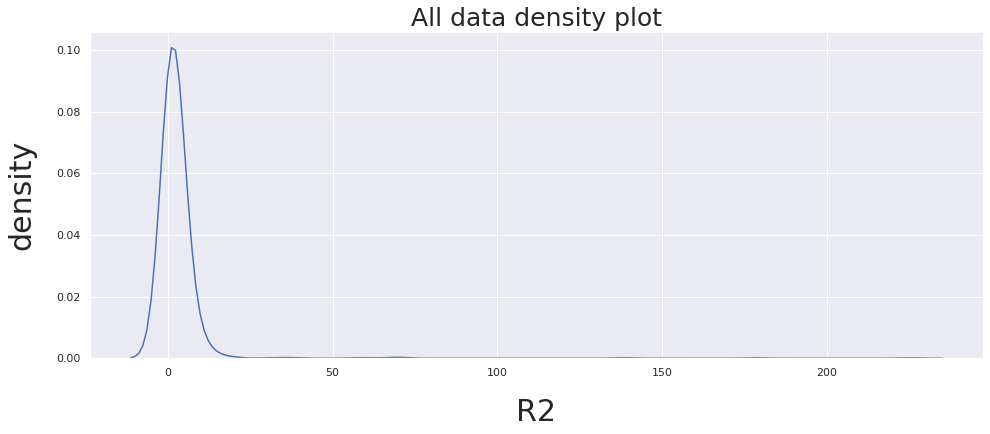

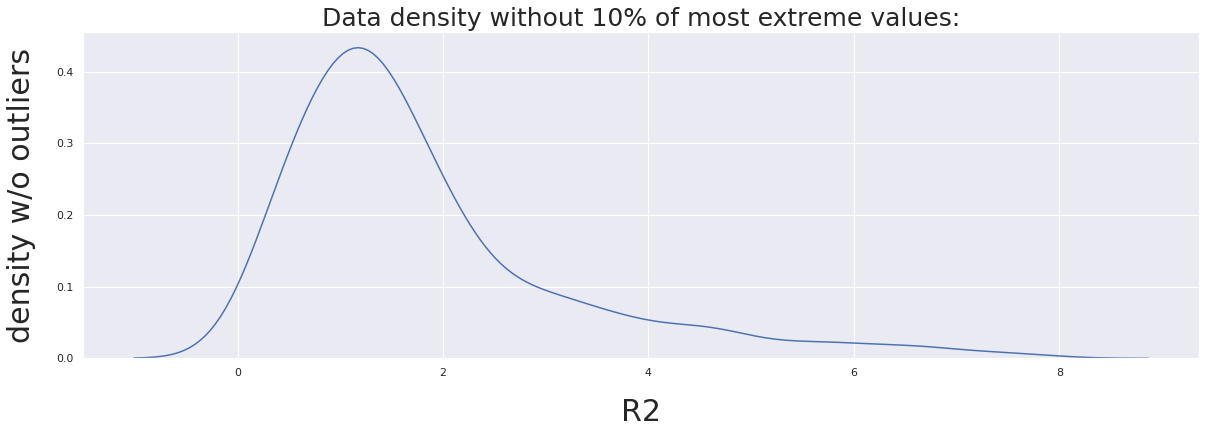

SkewtestResult(statistic=31.239796849867123, pvalue=3.0717580678361034e-214)


*********************************************************************************************************
R3
count    702.000000
mean       1.133027
std        6.748970
min       -0.192000
25%        0.049000
50%        0.162000
75%        0.650750
max      138.599000
Name: R3, dtype: float64


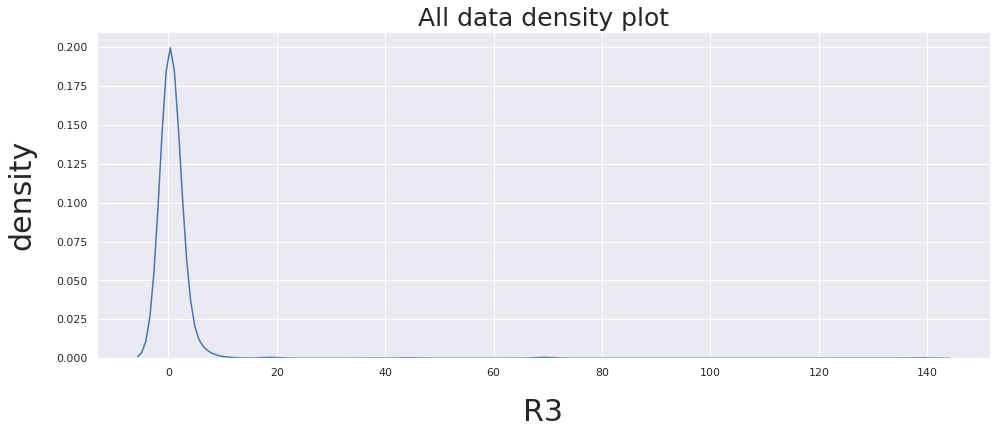

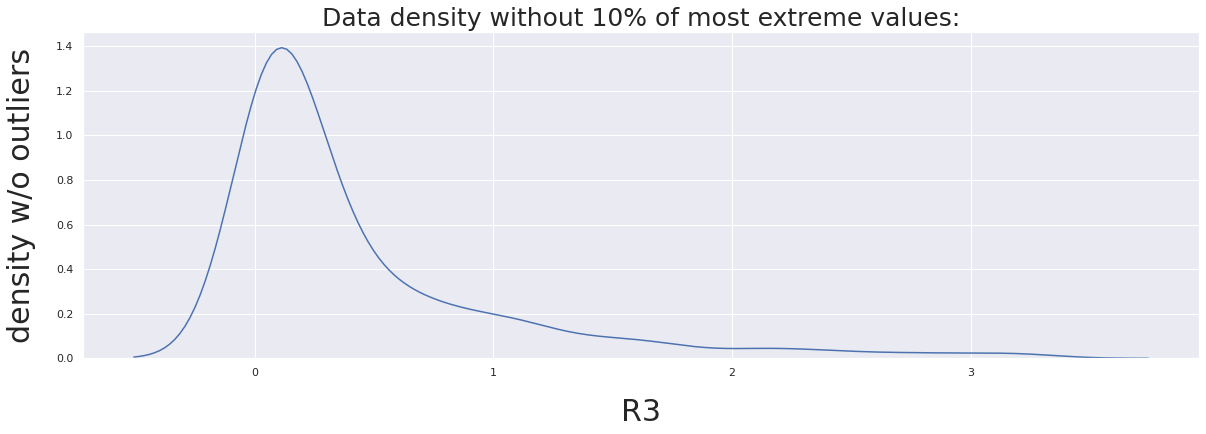

SkewtestResult(statistic=32.805428887771626, pvalue=4.926788087241064e-236)


*********************************************************************************************************
R4
count    702.000000
mean       0.638238
std        1.566093
min        0.000000
25%        0.350500
50%        0.635000
75%        0.805000
max       41.400000
Name: R4, dtype: float64


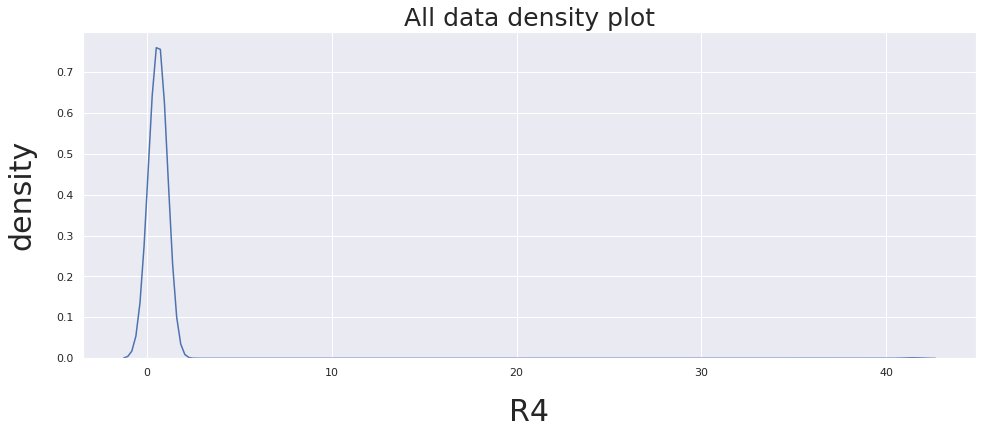

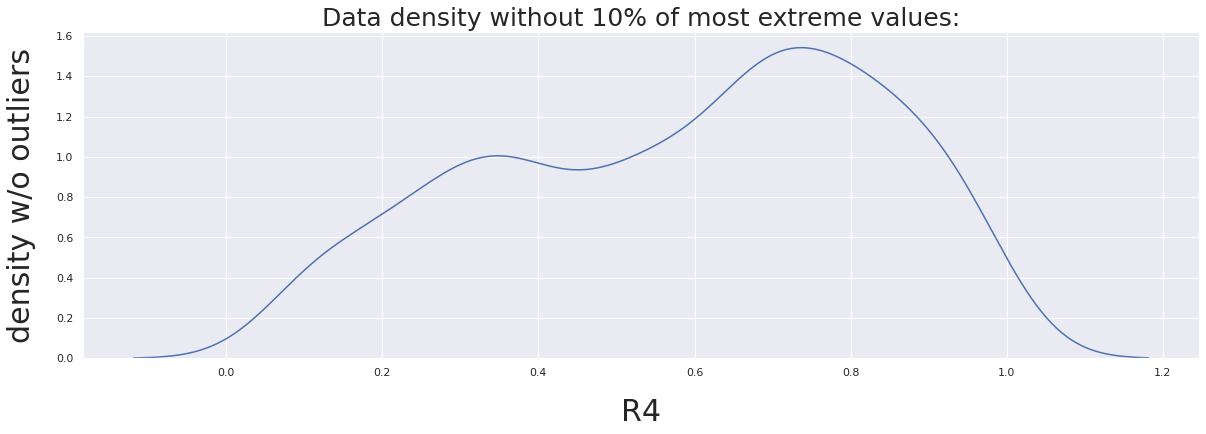

SkewtestResult(statistic=37.2242097308403, pvalue=2.7701931393604262e-303)


*********************************************************************************************************
R5
count    702.000000
mean       0.758123
std        4.507363
min       -0.372000
25%        0.170250
50%        0.388000
75%        0.776250
max      118.336000
Name: R5, dtype: float64


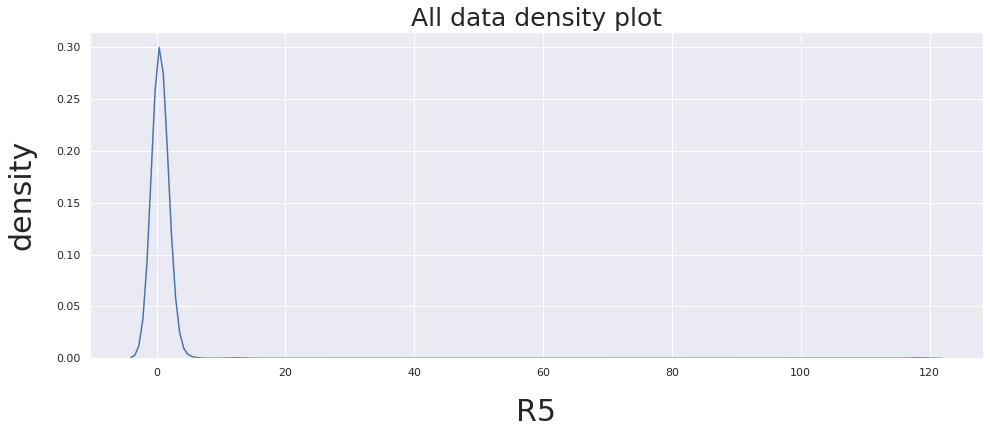

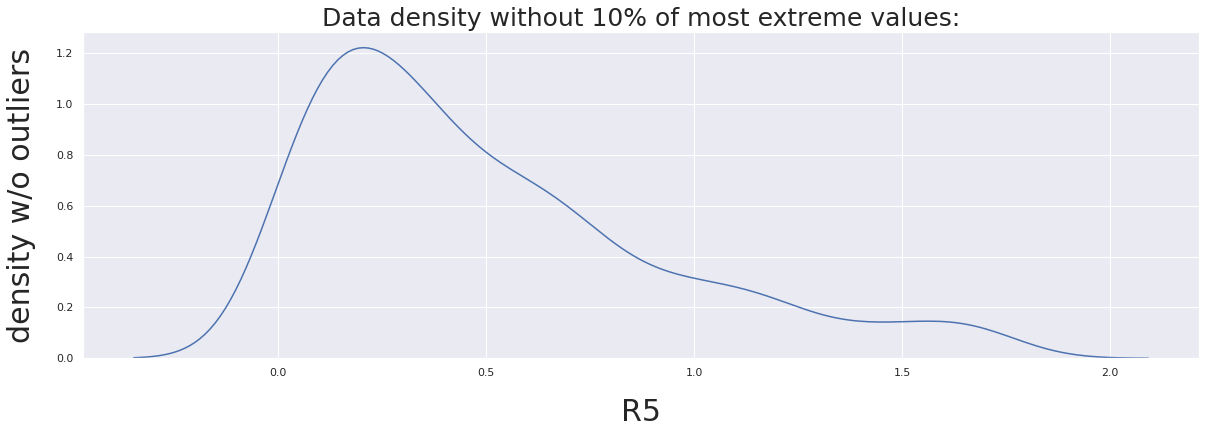

SkewtestResult(statistic=37.29674191652949, pvalue=1.8533124529169043e-304)


*********************************************************************************************************
R6
count    702.000000
mean       2.636909
std       26.637438
min       -1.687000
25%        0.381250
50%        0.725000
75%        1.379000
max      601.218000
Name: R6, dtype: float64


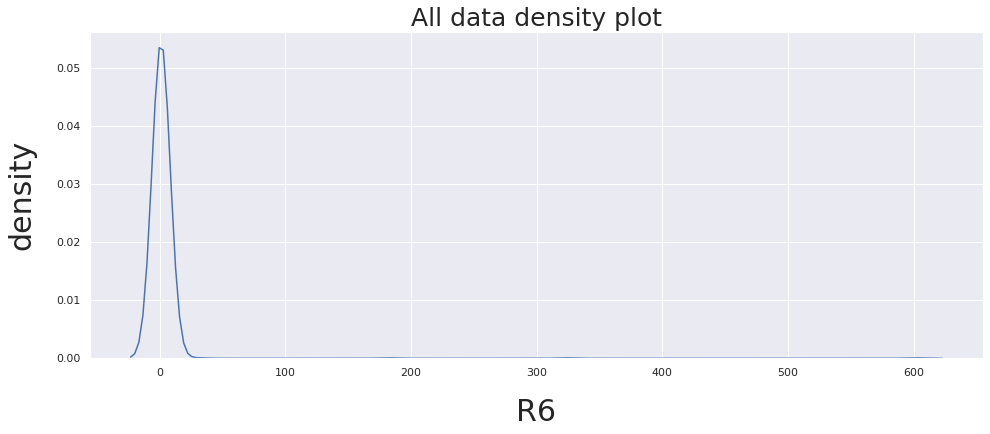

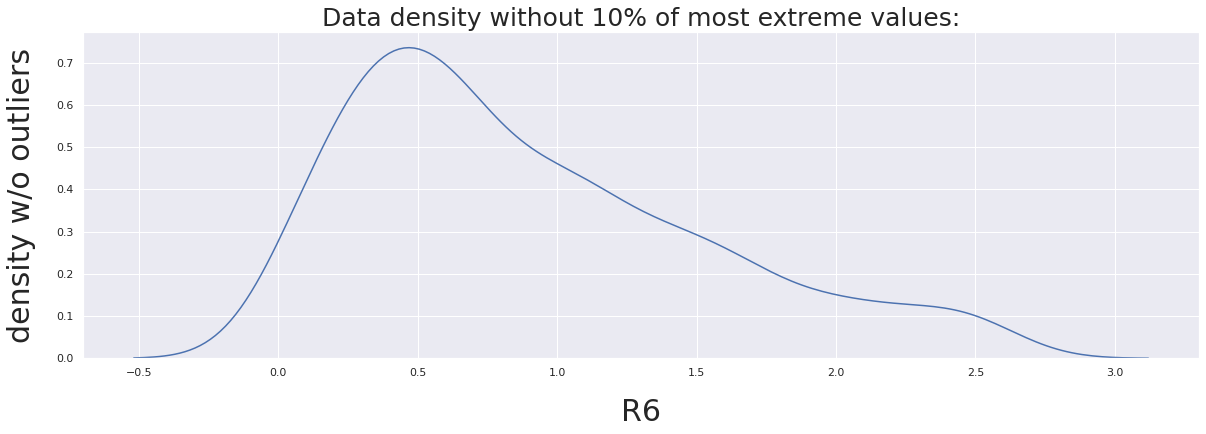

SkewtestResult(statistic=34.748863747186284, pvalue=1.4418600811039244e-264)


*********************************************************************************************************
R7
count    702.000000
mean       1.751678
std       27.648750
min     -361.616000
25%       -0.068500
50%        0.969500
75%        2.764500
max      423.662000
Name: R7, dtype: float64


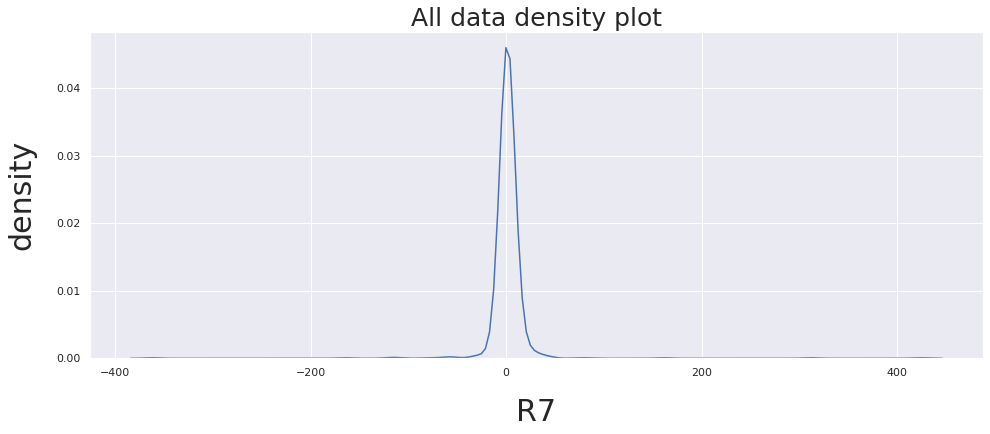

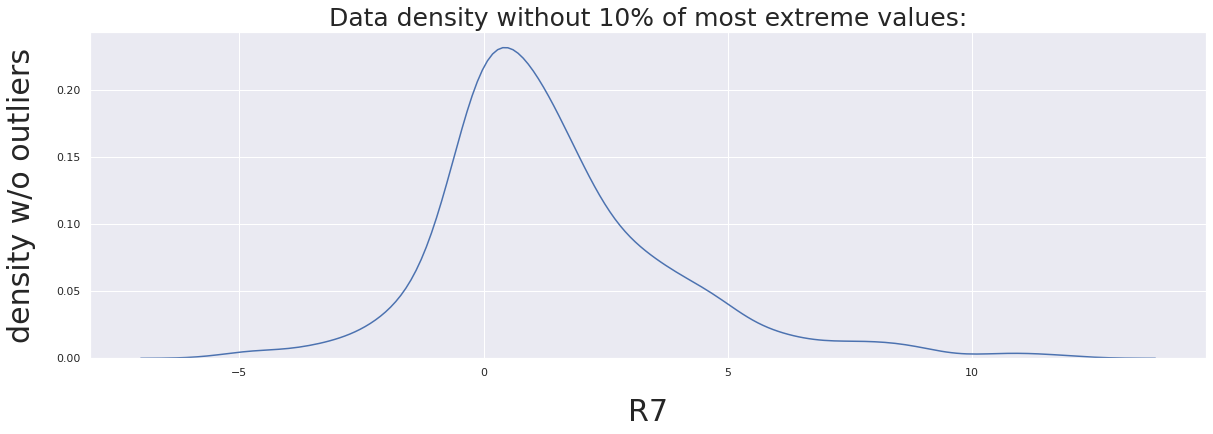

SkewtestResult(statistic=19.60812689570265, pvalue=1.3179704681575338e-85)


*********************************************************************************************************
R8
count    702.000000
mean      19.398826
std       57.691972
min       -2.733000
25%        1.839500
50%        5.313000
75%       13.677250
max      807.862000
Name: R8, dtype: float64


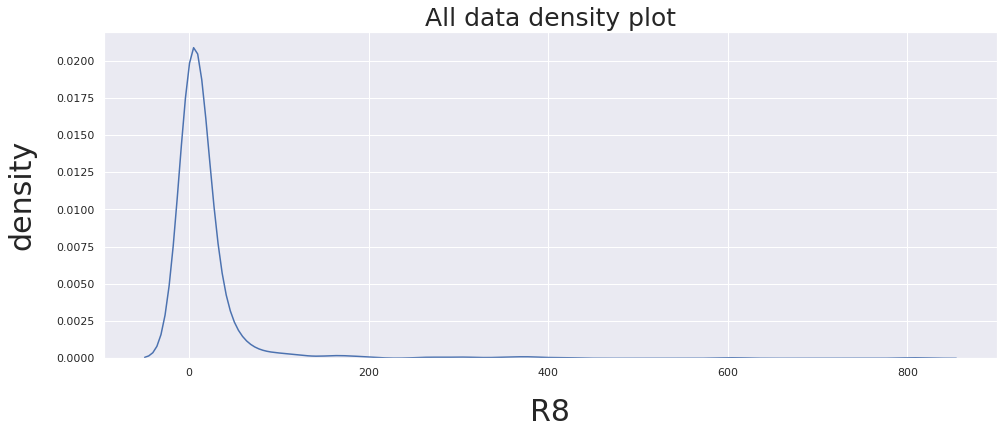

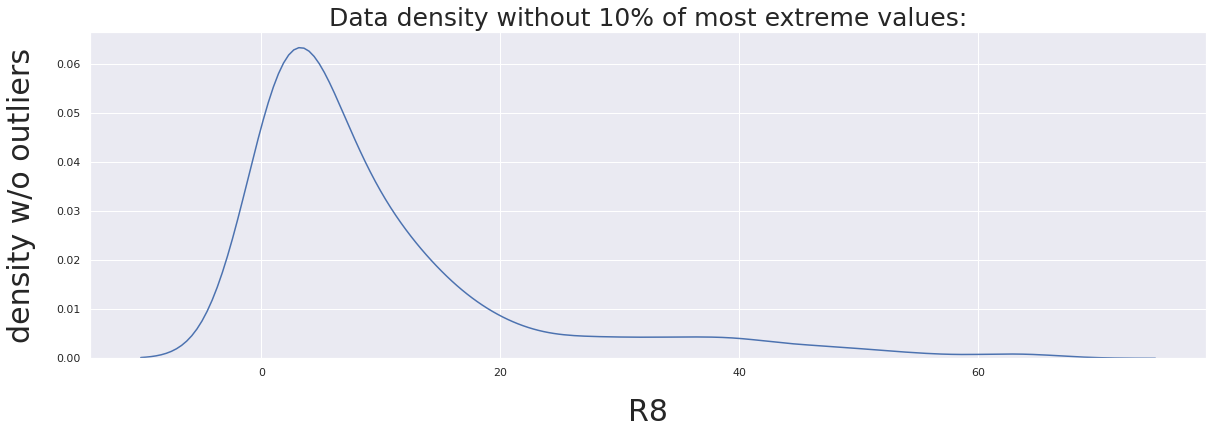

SkewtestResult(statistic=26.513029519813355, pvalue=6.858419621265809e-155)


*********************************************************************************************************
R13
count    702.000000
mean       0.056994
std        8.520418
min     -173.540000
25%       -0.015750
50%        0.047000
75%        0.147000
max       67.871000
Name: R13, dtype: float64


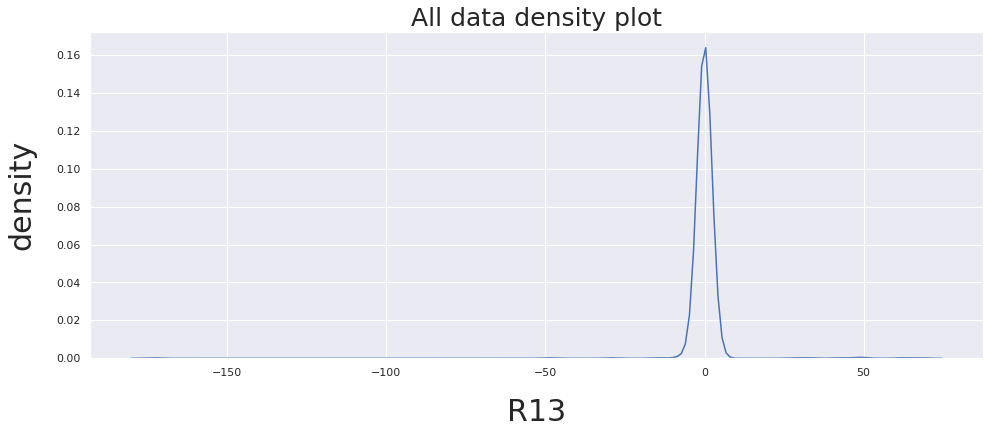

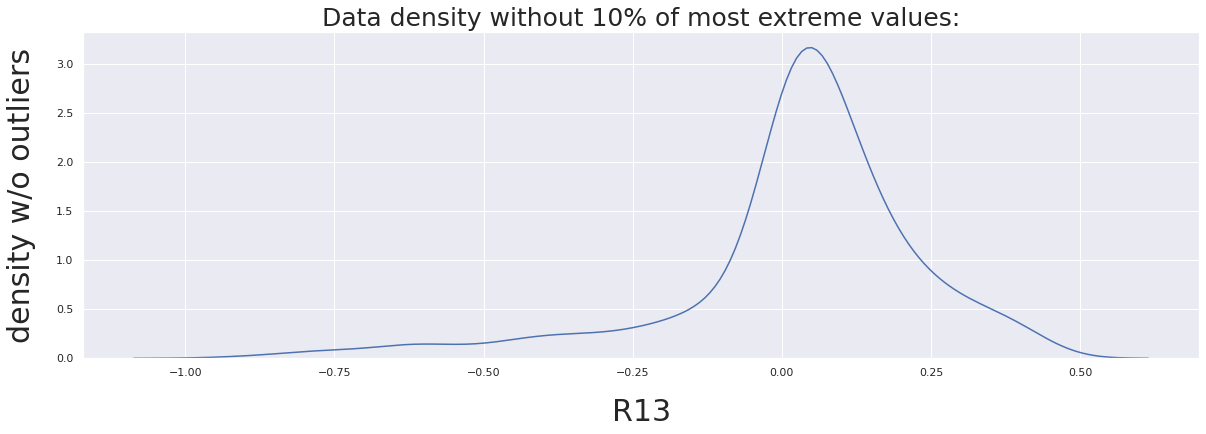

SkewtestResult(statistic=-29.116703847976964, pvalue=2.2063208275501916e-186)


*********************************************************************************************************
R14
count    702.000000
mean       0.049625
std        0.895041
min       -9.679000
25%       -0.009000
50%        0.020000
75%        0.073000
max       20.701000
Name: R14, dtype: float64


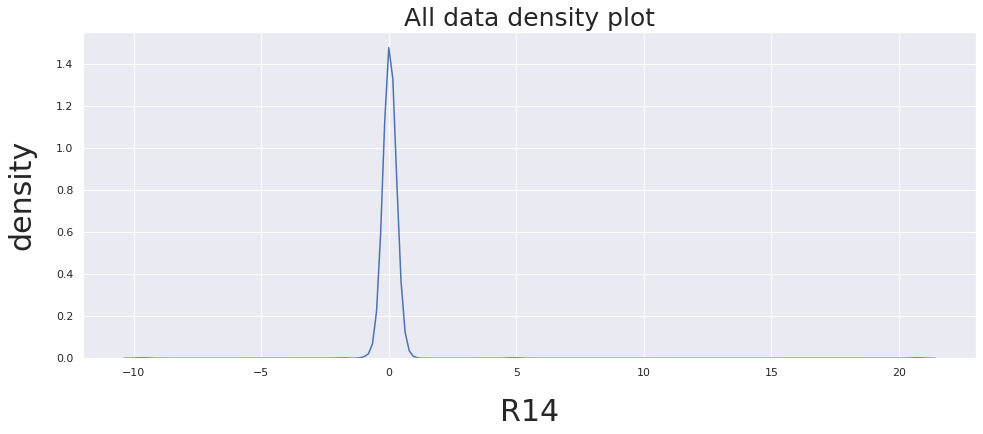

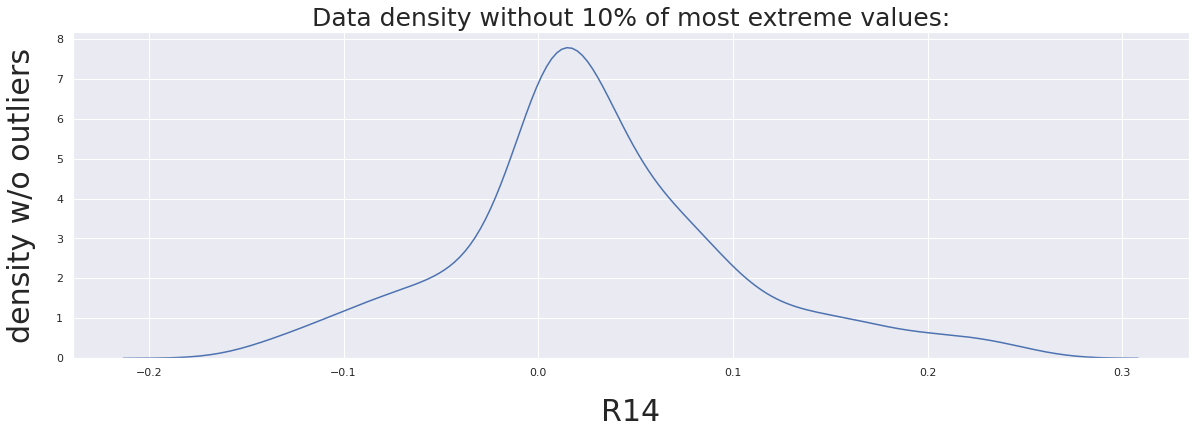

SkewtestResult(statistic=33.07063905897365, pvalue=7.857660815799986e-240)


*********************************************************************************************************
R15
count    702.000000
mean       5.831028
std       37.647118
min     -153.497000
25%       -0.017750
50%        0.111000
75%        0.691750
max      487.771000
Name: R15, dtype: float64


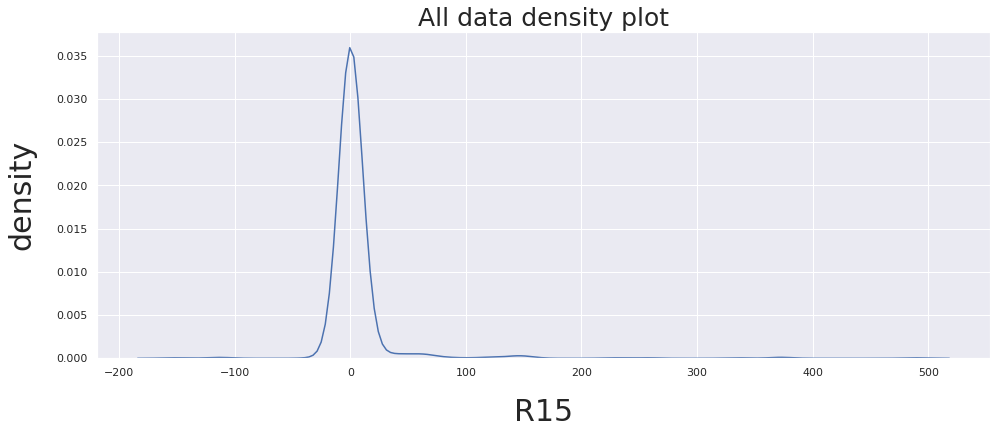

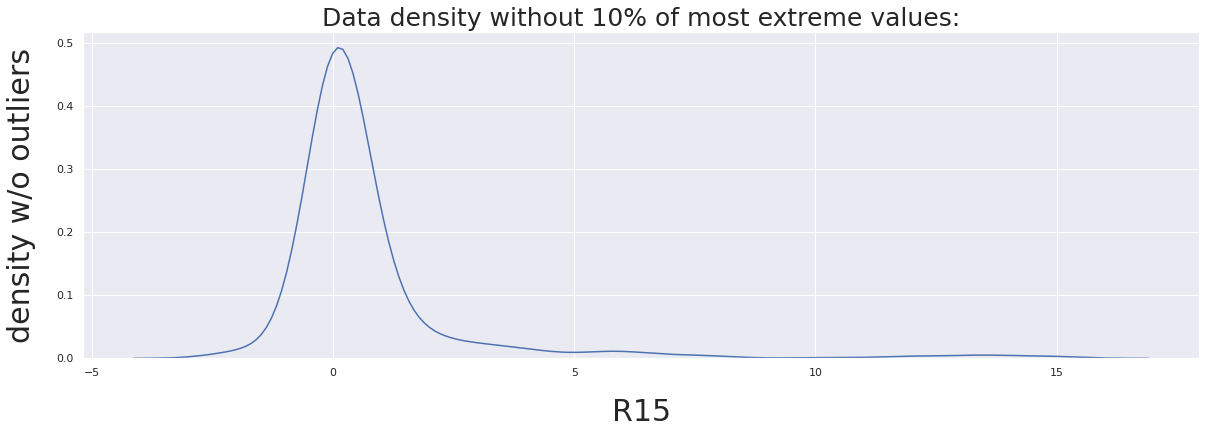

SkewtestResult(statistic=26.497721901985116, pvalue=1.0296325637134293e-154)


*********************************************************************************************************
R16
count    702.000000
mean       0.065348
std        0.815433
min       -1.895000
25%       -0.006750
50%        0.022000
75%        0.075000
max       20.701000
Name: R16, dtype: float64


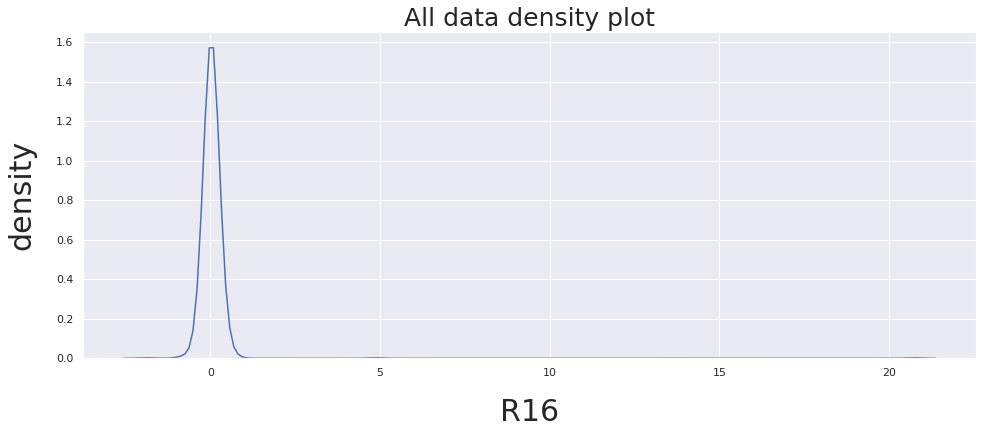

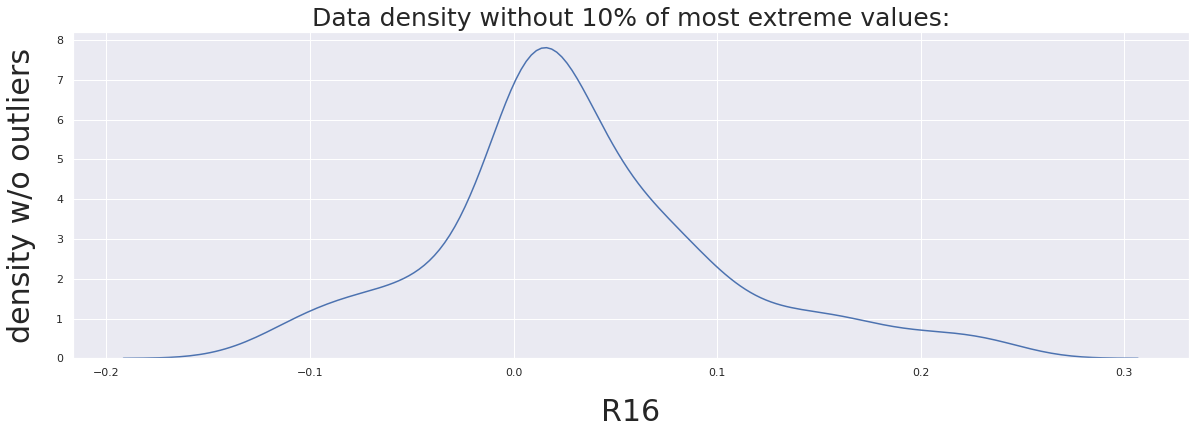

SkewtestResult(statistic=36.567384050991954, pvalue=9.4399395664109e-293)




In [24]:
print('Output 4.1')
print('Continious features distributions\n')
for col in df.columns:
    if col == 'Y':
        continue
    print('*********************************************************************************************************')
    print(col)
    print(df[col].describe())
    
    plt.figure(figsize=(16, 6))
    sns.kdeplot(x=df[col])
    plt.title('All data density plot', size=25)
    plt.xlabel(col, size=30, labelpad=20)
    plt.ylabel('density', size=30, labelpad=20)
    plt.show()
    
    temp_df = df[(df[col] > df[col].quantile(0.05)) & (df[col] < df[col].quantile(0.95))]
    plt.figure(figsize=(20, 6))
    sns.kdeplot(x=temp_df[col])
    plt.title('Data density without 10% of most extreme values:', size=25)
    plt.xlabel(col, size=30, labelpad=20)
    plt.ylabel('density w/o outliers', size=30, labelpad=20)
    plt.show()
    print(skewtest(df[col]))
    print('\n')

#### Target distribution in deciles of features is given in (Output 4.2). For the sake of interpretability, (Output 4.2) has been computed on subsample of training sample. The subsample has been created by randomly removing such a rows, for which perfect 50/50 target distribution in subsample has been achieved.

Output 4.2
Visual examination of the target distribution in deciles of features



<Figure size 432x288 with 0 Axes>

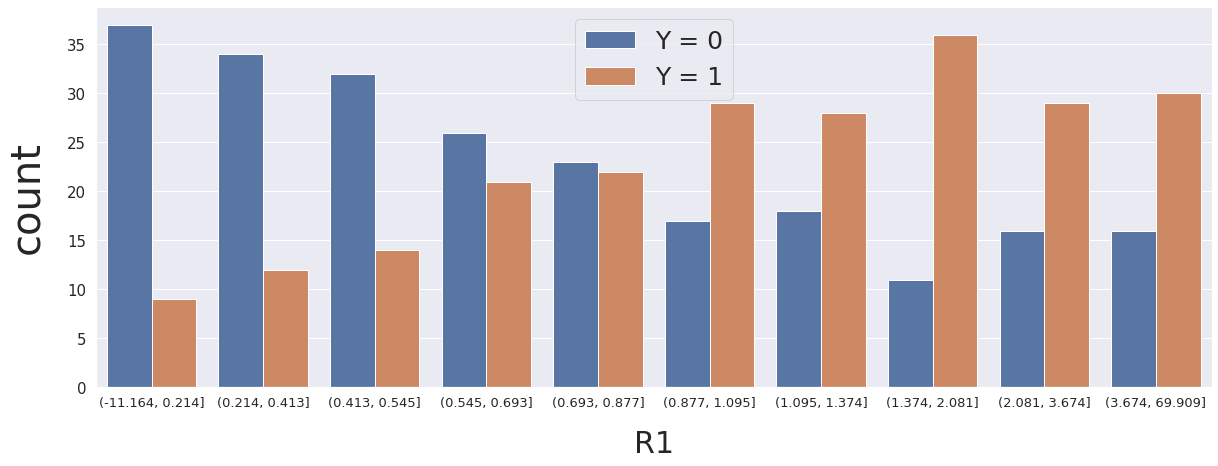

<Figure size 432x288 with 0 Axes>

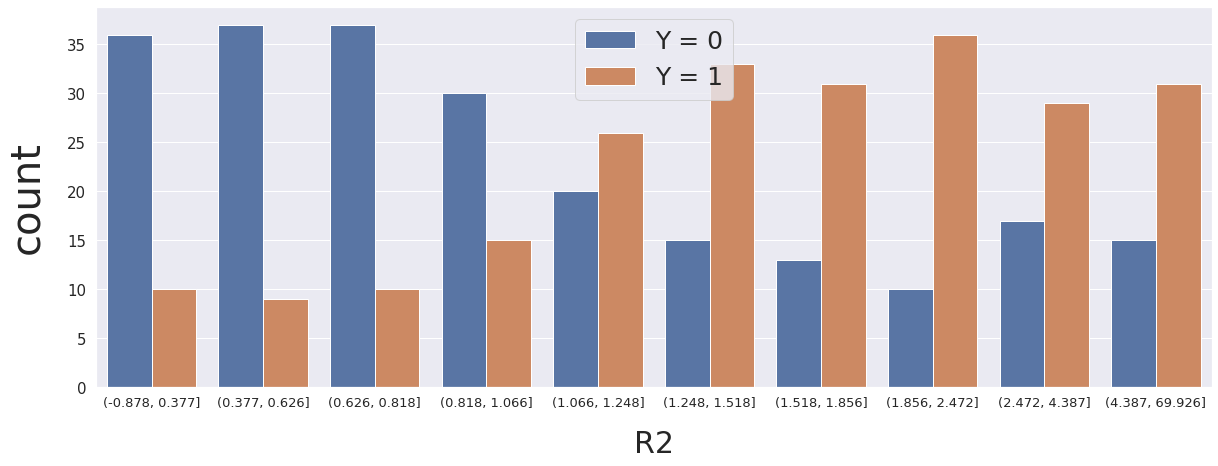

<Figure size 432x288 with 0 Axes>

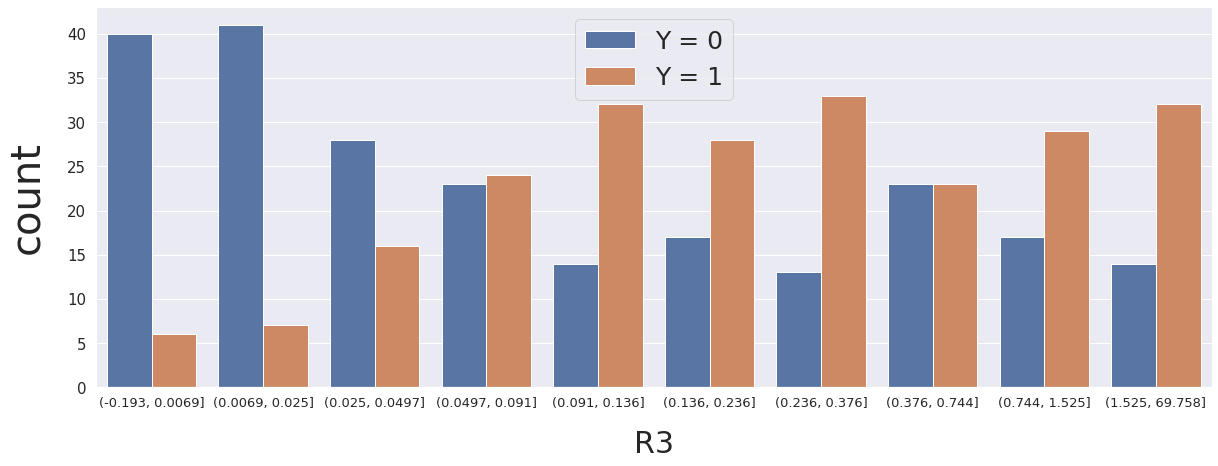

<Figure size 432x288 with 0 Axes>

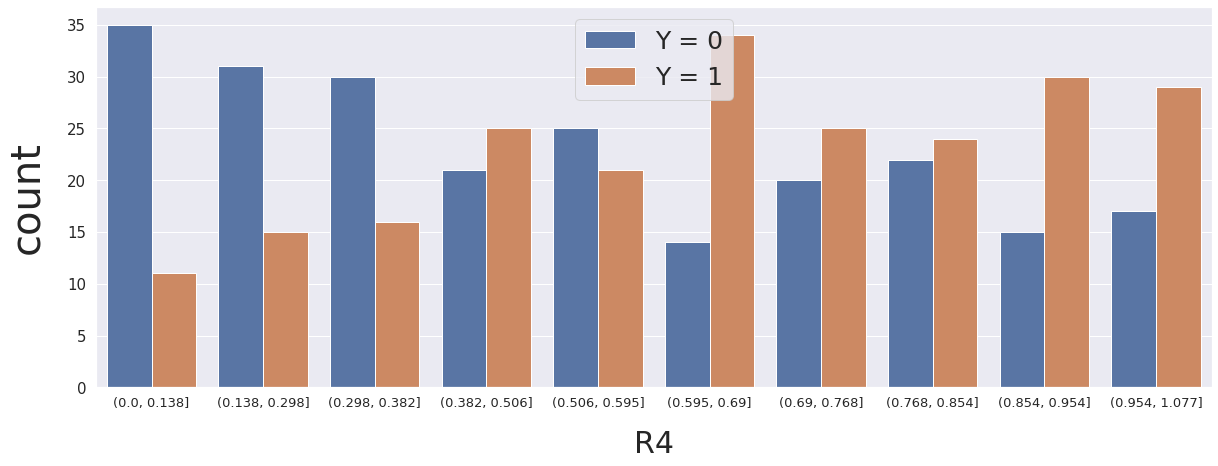

<Figure size 432x288 with 0 Axes>

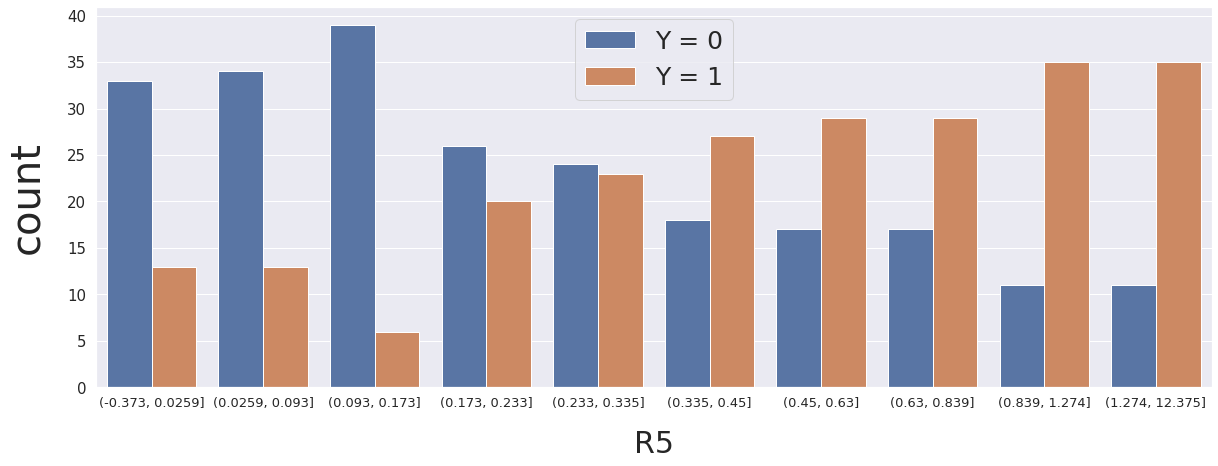

<Figure size 432x288 with 0 Axes>

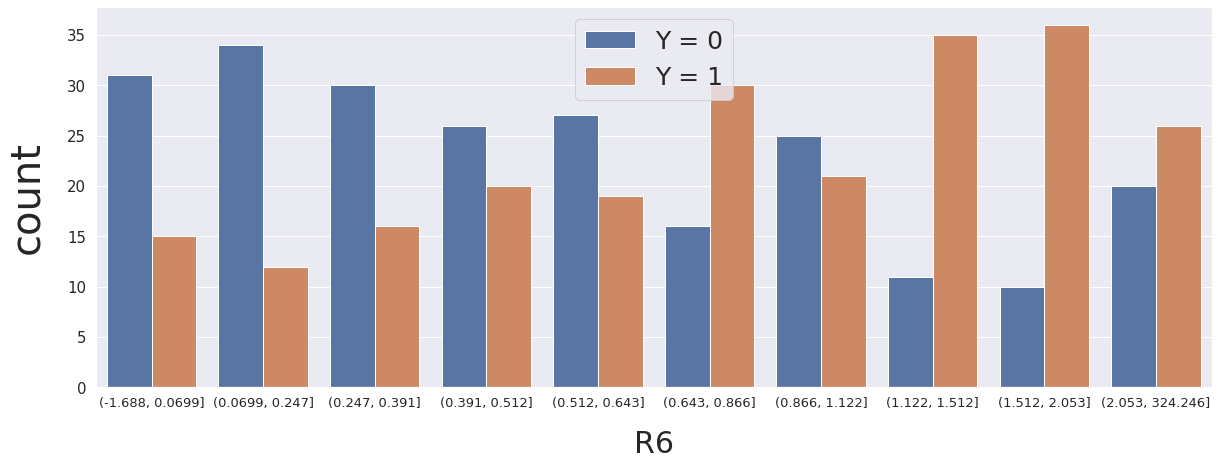

<Figure size 432x288 with 0 Axes>

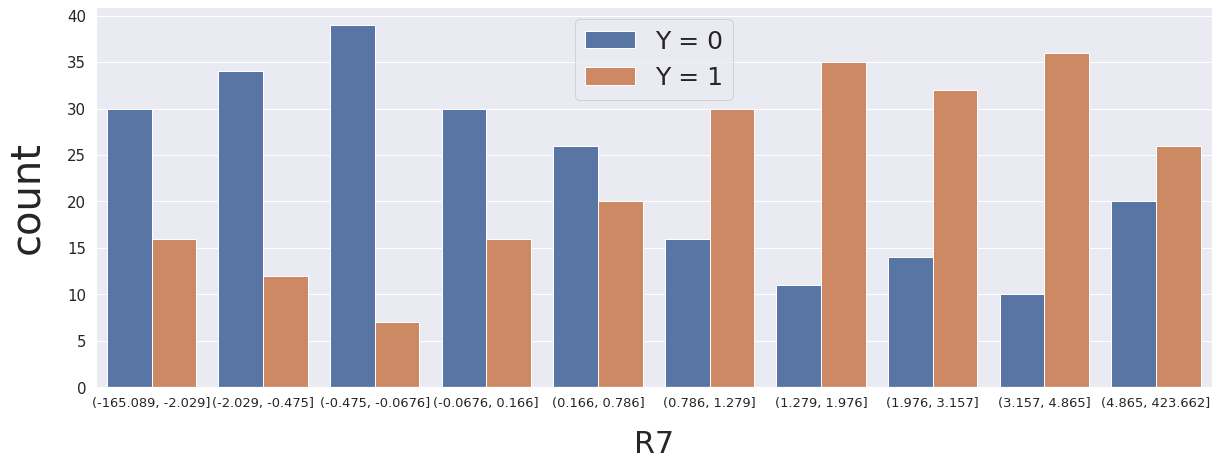

<Figure size 432x288 with 0 Axes>

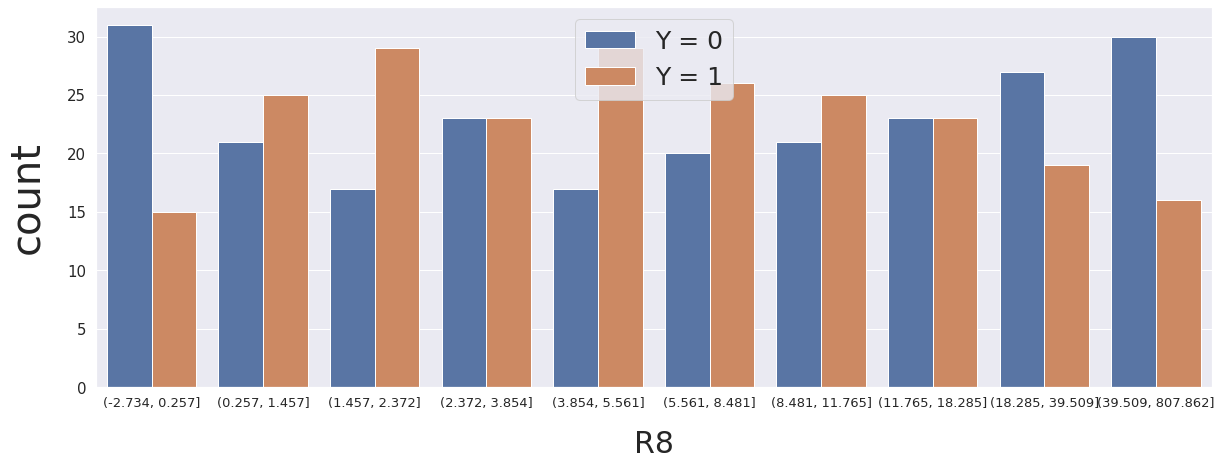

<Figure size 432x288 with 0 Axes>

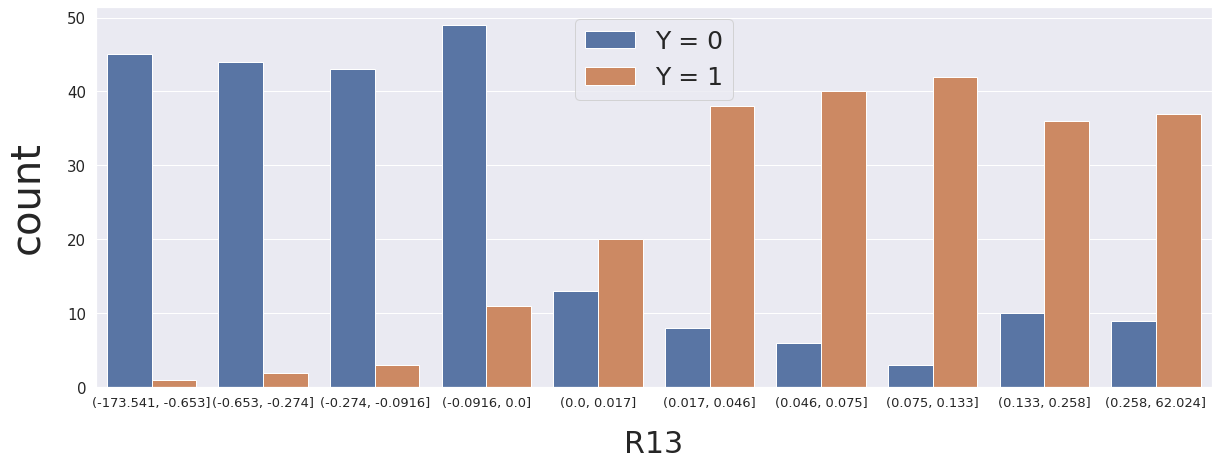

<Figure size 432x288 with 0 Axes>

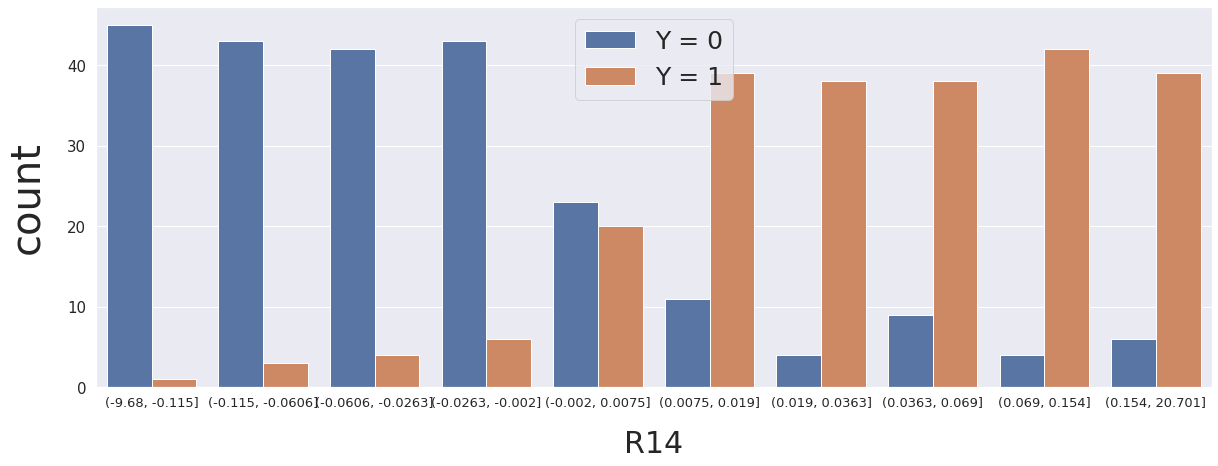

<Figure size 432x288 with 0 Axes>

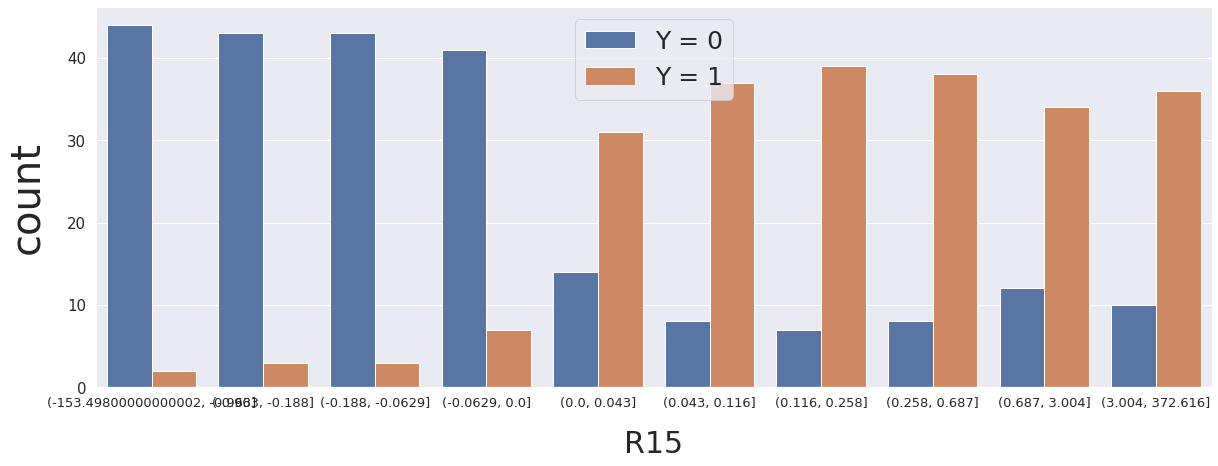

<Figure size 432x288 with 0 Axes>

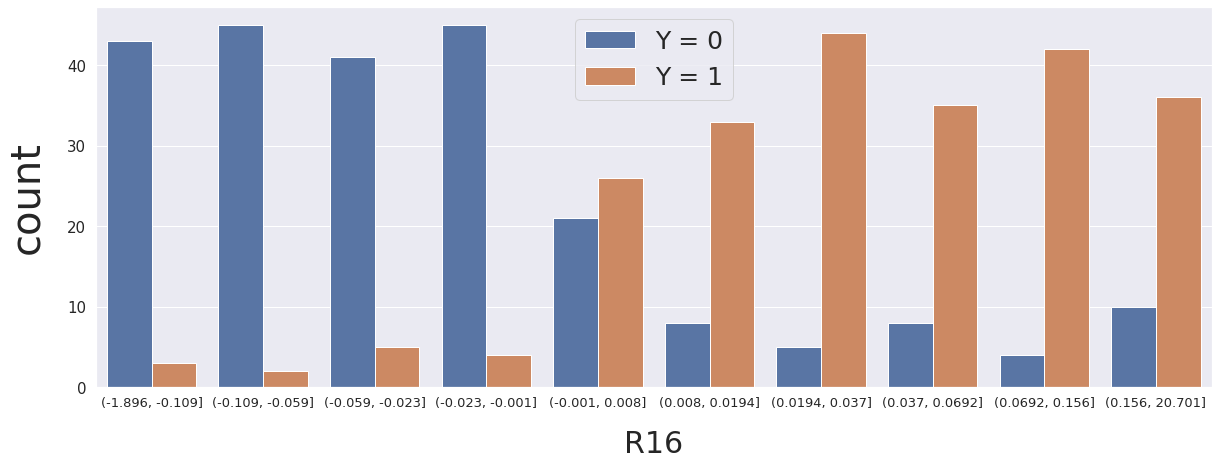

In [25]:
print('Output 4.2')
print('Visual examination of the target distribution in deciles of features\n')
Y1_set = df[df.Y == 1].sample(df.Y.value_counts()[1] - df.Y.value_counts()[0], random_state=666)
for i in Y1_set.index:
    df.drop(index=i, inplace=True)
for col in df.columns:
    if col == 'Y':
        continue
    plt.figure()
    fig, axs = plt.subplots(figsize=(20, 7))
    sns.countplot(x=pd.qcut(df[col], 10), hue='Y', data=df)
    plt.xlabel(col, size=30, labelpad=20)
    plt.ylabel('count', size=40, labelpad=20)
    plt.tick_params(axis='x', labelsize=13)
    plt.tick_params(axis='y', labelsize=15)
    plt.legend(['Y = 0', 'Y = 1'], loc='upper center', prop={'size': 25})
    plt.show()

# 5. Correlations

#### Broad correlational outlook for methods: Pearson, Spearman  and Kendall is displayed in (Output 5.1). <br><br>Pearson's linear coefficients visibly differs from rank-based Spearman and Kendall's coefficients what suggests nonlinear relationships within variables located in right bottom corner. Also, it does seem that features names might actually be ordered and generally some segmentation of underlying phenomenon is reflected.

Output 5.1a
Broad correlational outlook; method = Pearson



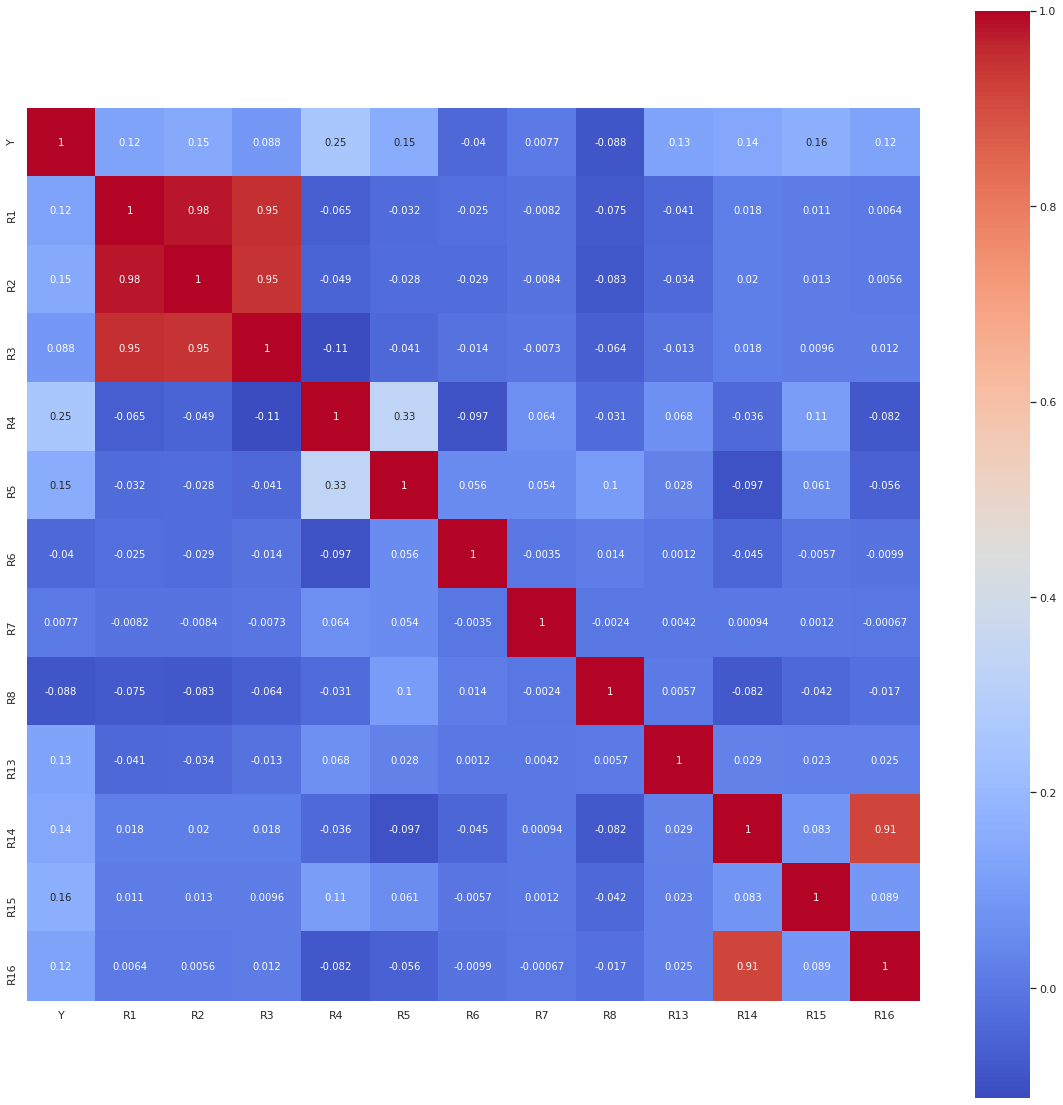

In [26]:
print('Output 5.1a')
print('Broad correlational outlook; method = Pearson\n')
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

Output 5.1b
Broad correlational outlook; method = Spearman



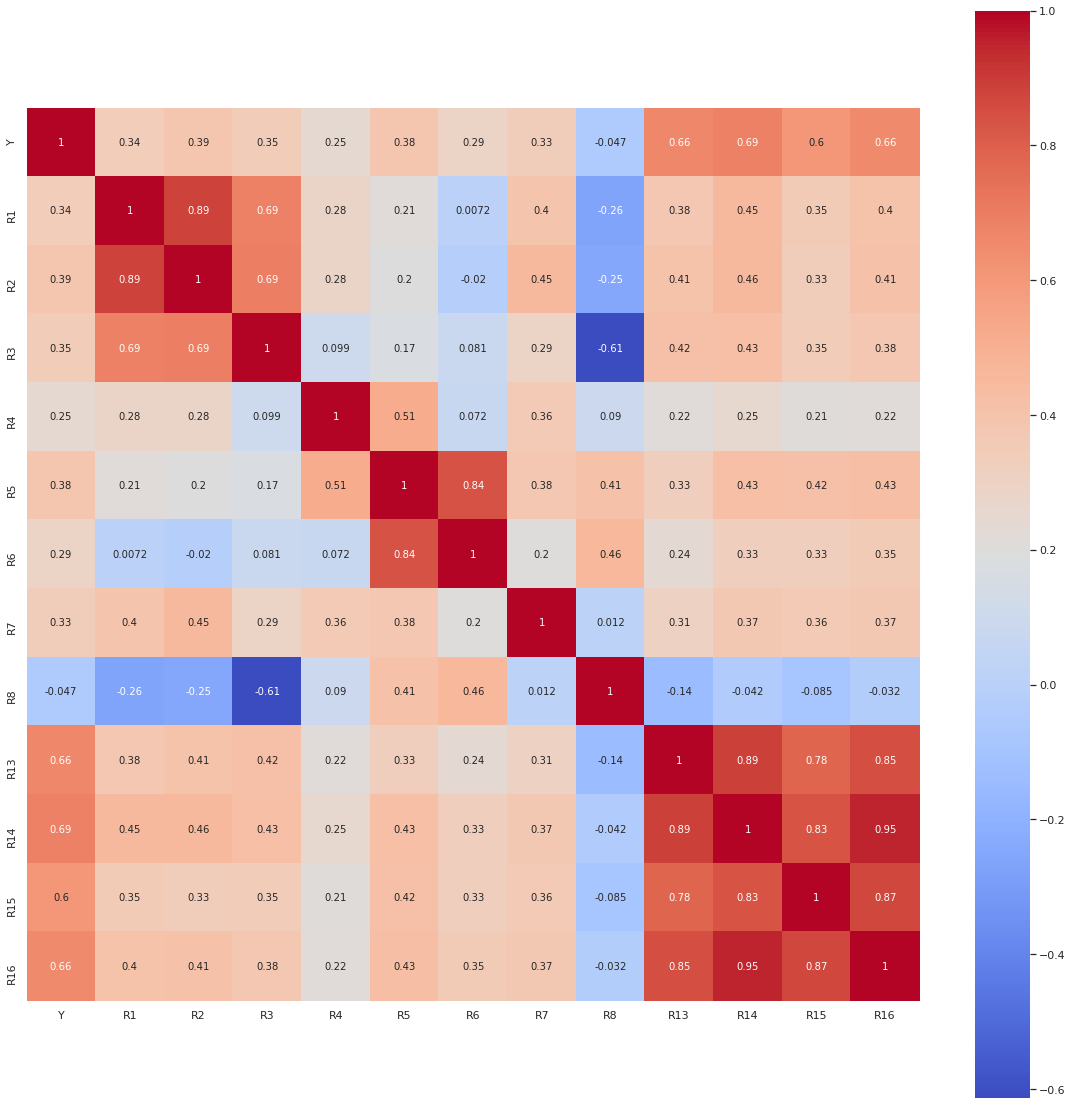

In [27]:
print('Output 5.1b')
print('Broad correlational outlook; method = Spearman\n')
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(method='spearman'), annot=True, square=True, cmap='coolwarm')
plt.show()

Output 5.1c
Broad correlational outlook; method = Kendall



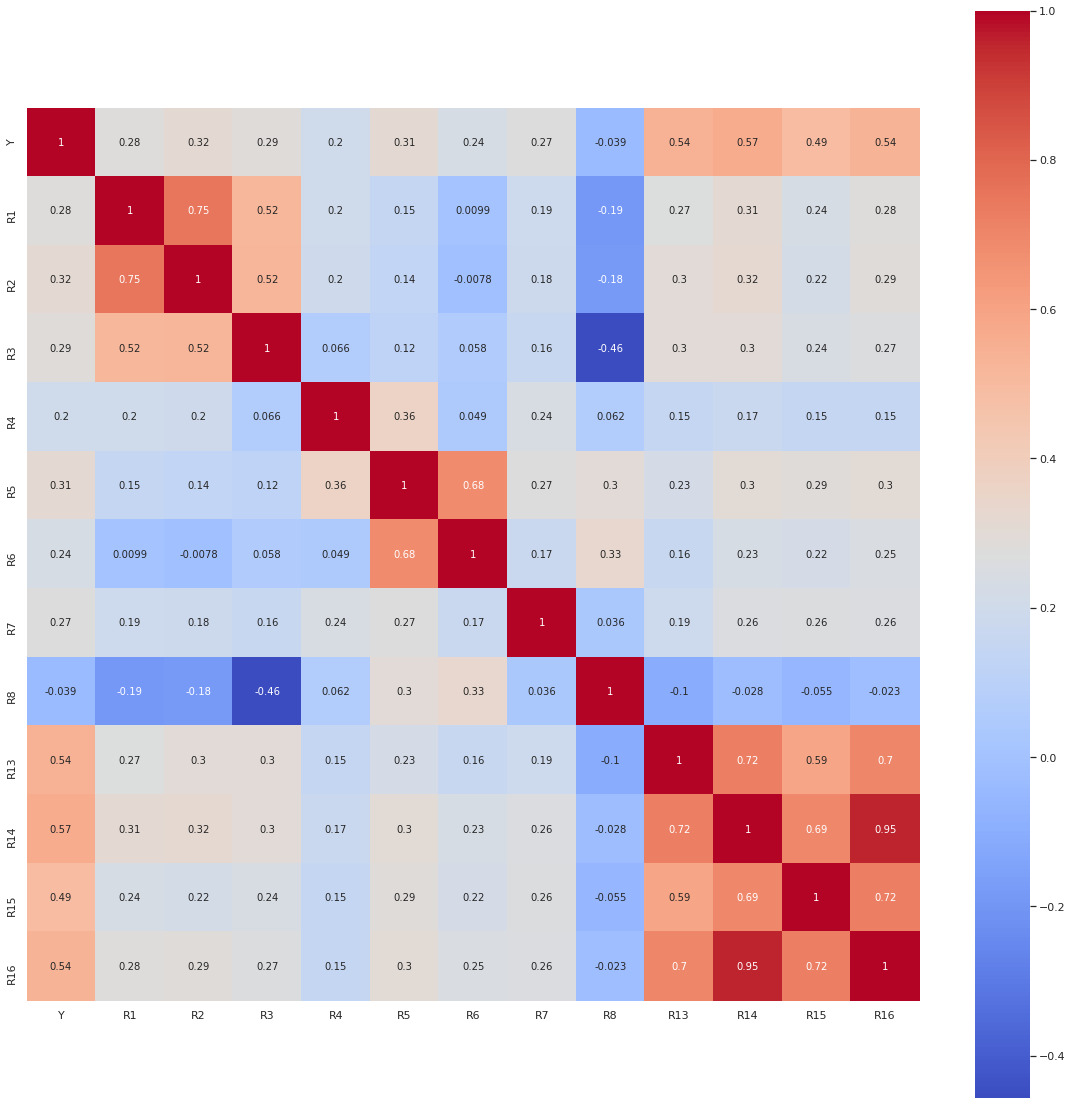

In [28]:
print('Output 5.1c')
print('Broad correlational outlook; method = Kendall\n')
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(method='kendall'), annot=True, square=True, cmap='coolwarm')
plt.show()

### Multicolinearity analysis within features

#### Either R1 or R2 can be excluded, according to (Output 5.1a).<br> Since R2 has slightly higher corr coefficients associated (Output 5.2), R1 is excluded (Output 5.3). 

Output 5.2


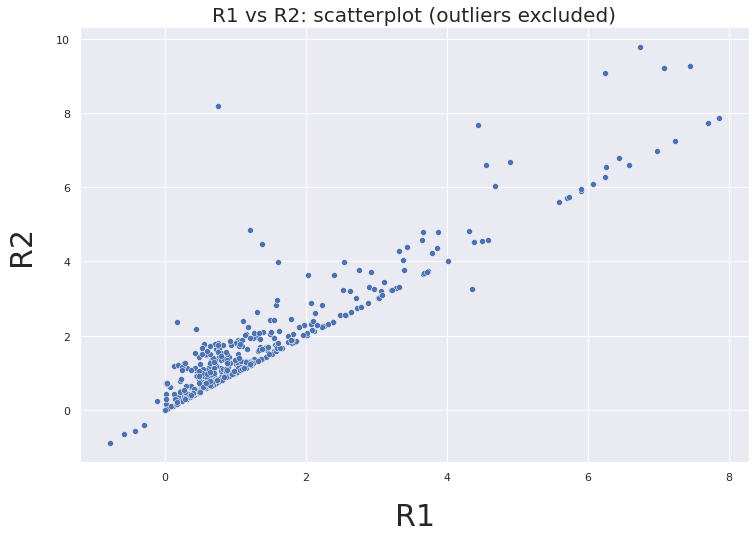


R1 vs target
Pearson corr coefficient between R1 and target with p_value:
(0.12407545610456114, 0.007717543201557673)

R1 vs target
Spearman corr coefficient between R1 and target with p_value:
SpearmanrResult(correlation=0.3400923183046064, pvalue=6.430296128013951e-14)

R1 vs target
Kendall corr coefficient between R1 and target with p_value:
(0.2780512808451486,3.1873716562927403e-13)

R2 vs target
Pearson corr coefficient between R2 and target with p_value:
(0.14787139580957465, 0.001470922350722701)

R2 vs target
Spearman corr coefficient between R2 and target with p_value:
SpearmanrResult(correlation=0.3876009198625283, pvalue=6.126260371672256e-18)

R2 vs target
Kendall corr coefficient between R2 and target with p_value:
(0.31686931168992466,1.0060204593233243e-16)


In [29]:
print('Output 5.2')
temp_df=df[(df['R1'] < 8) & (df['R1'] > -5)]
plt.figure(figsize=(12, 8))
sns.scatterplot(x=temp_df['R1'], y=temp_df['R2'],data=temp_df)
plt.title('R1 vs R2: scatterplot (outliers excluded)', size=20)
plt.xlabel('R1', size=30, labelpad=20)
plt.ylabel('R2', size=30, labelpad=20)
plt.show()
for col in ['R1', 'R2']:
    print('\n{} vs target'.format(col))
    print('Pearson corr coefficient between {} and target with p_value:'.format(col))
    print(scipy.stats.pearsonr(df['Y'], df[col]))
    print('\n{} vs target'.format(col))
    print('Spearman corr coefficient between {} and target with p_value:'.format(col))
    print(scipy.stats.spearmanr(df[['Y', col]]))
    print('\n{} vs target'.format(col))
    print('Kendall corr coefficient between {} and target with p_value:'.format(col))
    tau, p_value = stats.kendalltau(df['Y'], df[col])
    print('({},{})'.format(tau, p_value))

In [30]:
# Output 5.3
df = df.drop('R1', axis=1)
X_train = X_train.drop('R1', axis=1)
X_test = X_test.drop('R1', axis=1)

#### As (Output 5.1a) further indicates, this approach can be repeated with R14 and R16 (Output 5.4). This is a close call, but arguably R16 is excluded (Output 5.5).

Output 5.4


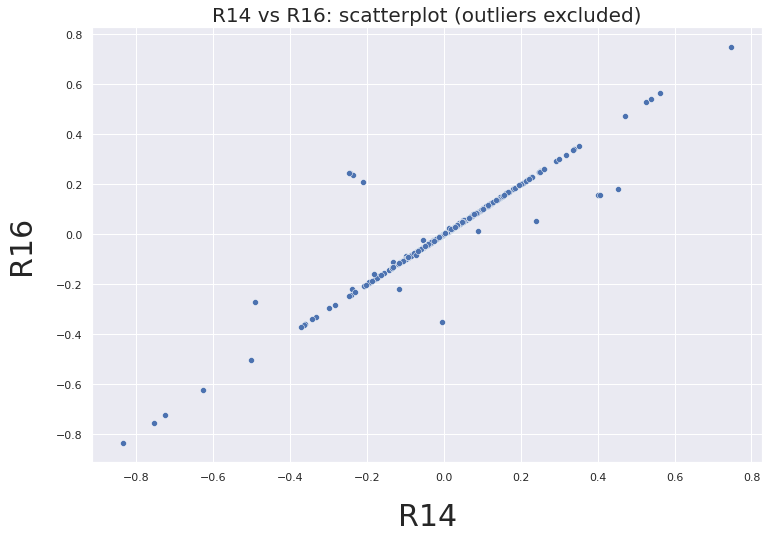


R14 vs target
Pearson corr coefficient between R14 and target with p_value:
(0.13900591012142646, 0.002810387459876774)

R14 vs target
Spearman corr coefficient between R14 and target with p_value:
SpearmanrResult(correlation=0.6911388644539158, pvalue=1.378855996915648e-66)

R14 vs target
Kendall corr coefficient between R14 and target with p_value:
(0.5660286466890768,1.3169521577333596e-49)

R16 vs target
Pearson corr coefficient between R16 and target with p_value:
(0.12447626317655414, 0.007520824055269815)

R16 vs target
Spearman corr coefficient between R16 and target with p_value:
SpearmanrResult(correlation=0.6574303900085752, pvalue=2.8863891996561798e-58)

R16 vs target
Kendall corr coefficient between R16 and target with p_value:
(0.5384550299420269,4.698168425355557e-45)


In [31]:
print('Output 5.4')
temp_df=df[(df['R14'] > -1.6) & (df['R16'] < 2) & (df['R14'] < 1.3)]
plt.figure(figsize=(12, 8))
sns.scatterplot(x=temp_df['R14'], y=temp_df['R16'],data=temp_df)
plt.title('R14 vs R16: scatterplot (outliers excluded)', size=20)
plt.xlabel('R14', size=30, labelpad=20)
plt.ylabel('R16', size=30, labelpad=20)
plt.show()
for col in ['R14', 'R16']:
    if col == 'Y':
        continue
    print('\n{} vs target'.format(col))
    print('Pearson corr coefficient between {} and target with p_value:'.format(col))
    print(scipy.stats.pearsonr(df['Y'], df[col]))
    print('\n{} vs target'.format(col))
    print('Spearman corr coefficient between {} and target with p_value:'.format(col))
    print(scipy.stats.spearmanr(df[['Y', col]]))
    print('\n{} vs target'.format(col))
    print('Kendall corr coefficient between {} and target with p_value:'.format(col))
    tau, p_value = stats.kendalltau(df['Y'], df[col])
    print('({},{})'.format(tau, p_value))

In [32]:
# Output 5.5
df = df.drop('R16', axis=1)
X_train = X_train.drop('R16', axis=1)
X_test = X_test.drop('R16', axis=1)

#### Remaining features might convey predictive information and are included for Modelling phase.

# 6. Modelling

Number of estimators are GridSearched in effort to find the best suited model:
1. LogisticRegression
2. RandomForestClassifier
3. KNeighborsClassifier
4. SGDClassifier
5. GradientBoostingClassifier

Next, training sample performance is examinated.

#### The setup is as follows: data is binned with KBinsDiscretizer in order to counter outliers issue. Estimators are then GridSearched; adopted hyperparameters grid is shown in (Output 6.1).

In [33]:
# Output 6.1
prep = make_column_transformer((KBinsDiscretizer(n_bins=10, encode='ordinal'), X_train.columns))

pipelines = {
    'logreg':make_pipeline(prep, LogisticRegression(random_state=8, max_iter=775)),
    'forest':make_pipeline(prep, RandomForestClassifier(random_state=8)),
    'knn':make_pipeline(prep, KNeighborsClassifier()),
    'sgd':make_pipeline(prep, SGDClassifier(random_state=8, max_iter=87000)),
    'gbc':make_pipeline(prep, GradientBoostingClassifier(random_state=8))   
}

hypergrid = {
    'logreg': {
        'logisticregression__C':[1.4, 2, 2.6, 4, 5.7, 7.8],
        'logisticregression__solver':['lbfgs', 'liblinear']
    },
    'forest': {
        'randomforestclassifier__n_estimators':[8, 20, 22, 24, 46, 52],
        'randomforestclassifier__criterion':['gini', 'entropy'],
        'randomforestclassifier__min_samples_leaf':[16, 18, 19, 20]
    },
    'knn': {
        'kneighborsclassifier__n_neighbors':list(range(160, 220, 5)),
        'kneighborsclassifier__weights':['uniform', 'distance']
    },
    'sgd': {
        'sgdclassifier__loss':['modified_huber', 'squared_hinge', 'perceptron'],
        'sgdclassifier__penalty':['l2', 'l1', 'elasticnet'],
        'sgdclassifier__alpha':[0.0001, 0.001, 0.01]
    },

    'gbc': {
        'gradientboostingclassifier__learning_rate':[0.02, 0.075, 0.1, 0.15, 0.25],
        'gradientboostingclassifier__n_estimators':[24, 30, 60, 90, 120],
        'gradientboostingclassifier__loss':['exponential', 'deviance']
    }
}

#### Training is processed (Output 6.2).

In [34]:
fit_models_acc = {}
fit_models_auc = {}
for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hypergrid[algo], cv=10, scoring='accuracy')
    model_auc = GridSearchCV(pipeline, hypergrid[algo], cv=10, scoring='roc_auc')
    try:
        print('Starting training for {}.'.format(algo))
        model.fit(X_train,y_train)
        model_auc.fit(X_train,y_train)
        fit_models_acc[algo] = model
        fit_models_auc[algo] = model_auc
        print('{} has been successfully fit.'.format(algo))
    except NotFittedError as e:
        print(repr(e))

Starting training for logreg.
logreg has been successfully fit.
Starting training for forest.
forest has been successfully fit.
Starting training for knn.
knn has been successfully fit.
Starting training for sgd.
sgd has been successfully fit.
Starting training for gbc.
gbc has been successfully fit.


#### Training performance is summarized in (Output 6.3)

In [35]:
print('Output 6.3')
print('in-sample training performance summary\n')
acc_train_results= {}
auc_train_results= {}
for algo in fit_models_acc.keys():
    acc_train_results[algo] = round(fit_models_acc[algo].best_score_, 5)
    auc_train_results[algo] = round(fit_models_auc[algo].best_score_ , 5)

acc_train_results = pd.Series(acc_train_results)
auc_train_results = pd.Series(auc_train_results)

train_results = pd.DataFrame(columns = ['ACC', 'AUC'])
train_results['ACC'] = acc_train_results
train_results['AUC'] = auc_train_results
print(train_results.sort_values(by='ACC', ascending=False))

Output 6.3
in-sample training performance summary

            ACC      AUC
gbc     0.90026  0.91010
forest  0.89318  0.91541
logreg  0.88748  0.90285
knn     0.87046  0.90453
sgd     0.85193  0.89344


# 7. Model evaluation

In [36]:
print('Output 7.1')
print('Prediction performance summary\n')
acc_test_results= {}
auc_test_results= {}
for algo in fit_models_acc.keys():
    y_pred_acc = fit_models_acc[algo].predict(X_test)
    y_pred_auc = fit_models_auc[algo].predict(X_test)
    acc_test_results[algo] = round(accuracy_score(y_test, y_pred_acc), 5)
    auc_test_results[algo] = round(roc_auc_score(y_test, y_pred_auc), 5)

acc_test_results = pd.Series(acc_test_results)
auc_test_results = pd.Series(auc_test_results)

test_results = pd.DataFrame(columns = ['ACC', 'AUC'])
test_results['ACC'] = acc_test_results
test_results['AUC'] = auc_test_results
print(test_results.sort_values(by='ACC', ascending=False))

Output 7.1
Prediction performance summary

            ACC      AUC
logreg  0.88068  0.85403
gbc     0.86932  0.83679
knn     0.86364  0.81487
forest  0.85795  0.81955
sgd     0.84659  0.81210


#### Confusion matrix for best estimator, logistic regression, is shown by (Output 7.2).

In [37]:
print('Output 7.2')
print('logreg confusion matrix\n')
y_pred = fit_models_acc['logreg'].predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

Output 7.2
logreg confusion matrix

[[ 45  13]
 [  8 110]]


#### Sensitivity and Specificity are further calculated in order to investigate within target class prediction performance (Output 7.3).<br> Also, ROC curve is plotted (Output 7.4).

In [38]:
print('Output 7.3')
print('Prediction performance for logreg (Sensivity and Specificity)\n')
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
print('Sensitivity, question inspected:')
print('When the acutal value is positive, how often is the prediction correct?')
print('sensitivity: {}\n'.format(round(TP/float(TP + FN), 4)))
print('Specificity, question inspected:')
print('When the acutal value is negative, how often is the prediction correct?')
print('specificity: {}'.format(round(TN/float(TN + FP), 4)))

Output 7.3
Prediction performance for logreg (Sensivity and Specificity)

Sensitivity, question inspected:
When the acutal value is positive, how often is the prediction correct?
sensitivity: 0.9322

Specificity, question inspected:
When the acutal value is negative, how often is the prediction correct?
specificity: 0.7759


Output 7.4
Receiver Operating Characteristic (logreg)



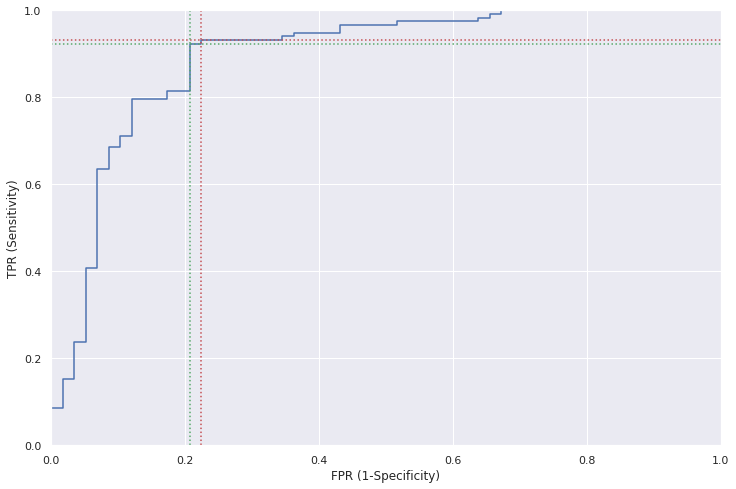

In [39]:
print('Output 7.4')
print('Receiver Operating Characteristic (logreg)\n')
proba = fit_models_acc['logreg'].predict_proba(X_test)
pred = proba[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
plt.figure(figsize=(12, 8))
plt.plot(fpr,tpr)
plt.axhline(y = round(TP/float(TP + FN), 5), color='r', linestyle='dotted') # default threshold = 0.5
plt.axvline(x = round(1 - TN/float(TN + FP), 5), color='r', linestyle='dotted') # # default threshold = 0.5
plt.axhline(y = 0.923728813559322, color='g', linestyle='dotted') # threshold = 0.5598
plt.axvline(x = 1-0.7931034482758621, color='g', linestyle='dotted') # # threshold = 0.5598
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR (1-Specificity)')
plt.ylabel('TPR (Sensitivity)')
plt.grid(True)
plt.show()

# 8. Threshold tuning

#### According to ROC curve, there is opportunity to tune slightly up default threshold (0.5) in order to move to the point indicated by green dotted lines (Output 7.4). This process is done manually, though is not time consuming. Optimal threshold is 0.5598 and little Sensitivity is traded for a little Specificity, as (Output 8.1) shows. 

In [40]:
print('Output 8.1\n')
def evaluate_threshold(threshold):
    print(tpr[thresholds > threshold][-1]) 
    print(1-fpr[thresholds > threshold][-1]) 
print('Optimal threshold (0.5598), sensitivity/specificity:')
evaluate_threshold(0.5598)
print('\n')
print('Threshold bigger by 0.0001 (0.5599), sensitivity/specificity:')
evaluate_threshold(0.5599)

Output 8.1

Optimal threshold (0.5598), sensitivity/specificity:
0.923728813559322
0.7931034482758621


Threshold bigger by 0.0001 (0.5599), sensitivity/specificity:
0.8135593220338984
0.7931034482758621


# 9. Best model

#### Finally, the best model is (Output 9.1):

In [41]:
print('Output 9.1')
print('Best estimator found for this data:\n\nLogistic regoression (threshold = 0.5598)')
new_thres_pred_acc = (fit_models_acc['logreg'].predict_proba(X_test)[:,1] >= 0.5598).astype(int)
new_thres_pred_auc = (fit_models_auc['logreg'].predict_proba(X_test)[:,1] >= 0.5598).astype(int)
print('ACC: {}'.format(round(accuracy_score(y_test, new_thres_pred_acc), 3)))
print(fit_models_acc['logreg'].best_params_)
print('AUC: {}'.format(round(roc_auc_score(y_test, new_thres_pred_auc), 3)))
print(fit_models_auc['logreg'].best_params_)

Output 9.1
Best estimator found for this data:

Logistic regoression (threshold = 0.5598)
ACC: 0.881
{'logisticregression__C': 5.7, 'logisticregression__solver': 'liblinear'}
AUC: 0.858
{'logisticregression__C': 7.8, 'logisticregression__solver': 'liblinear'}
